# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

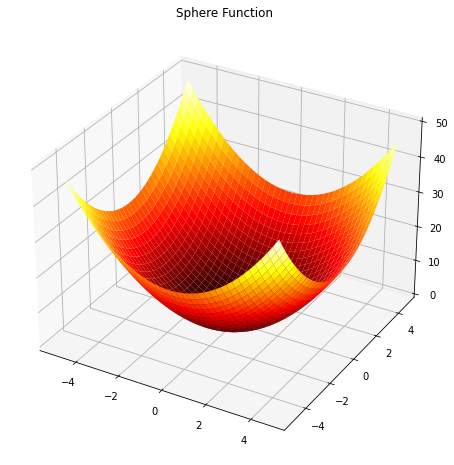

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

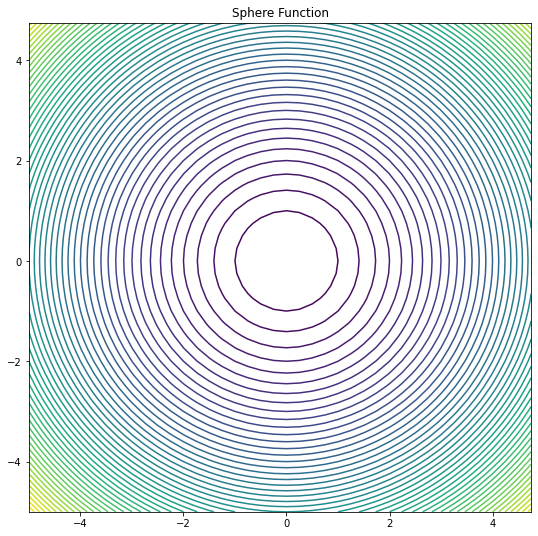

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

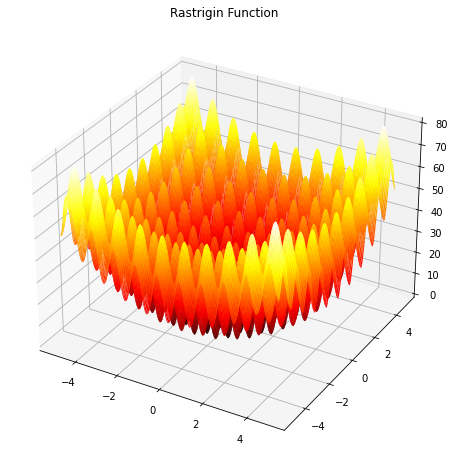

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

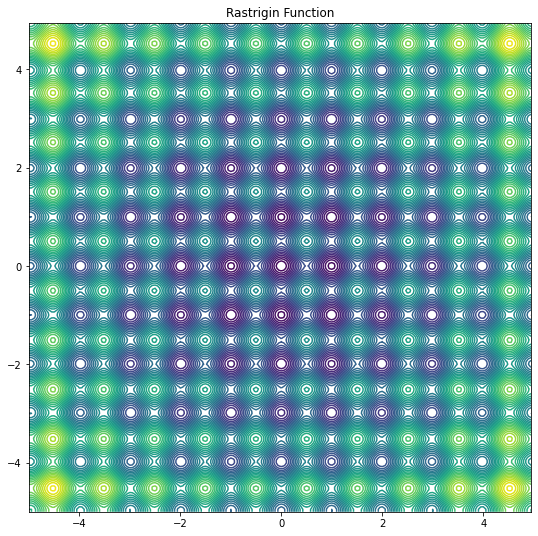

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

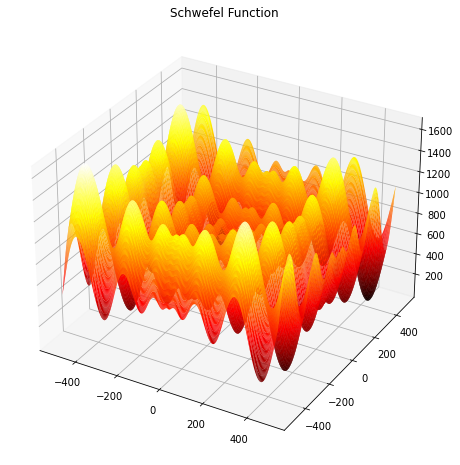

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

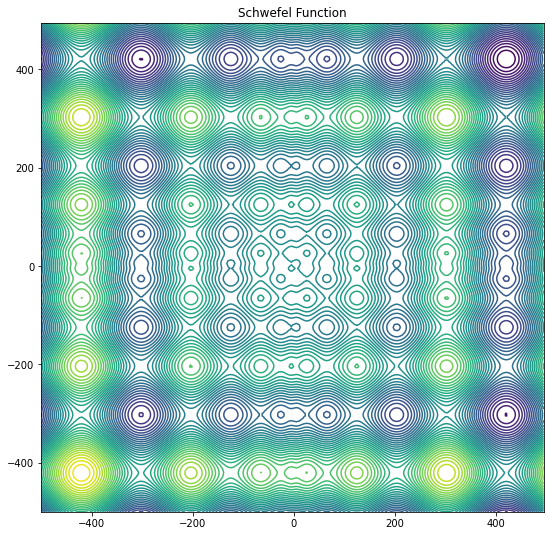

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

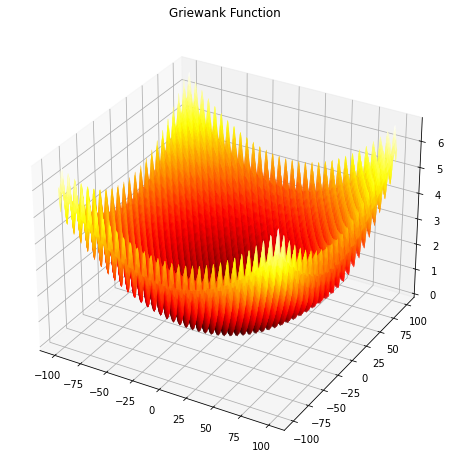

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

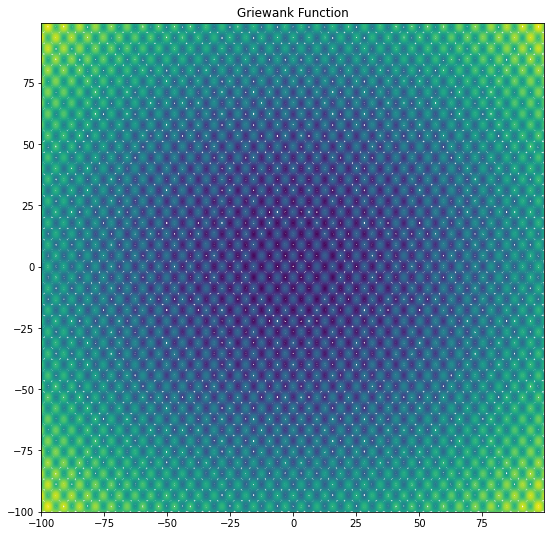

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [10]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [11]:
sigma = 0.25
sigmas=sigma * np.random.randn(N, d)
mutations = original_individual + sigmas

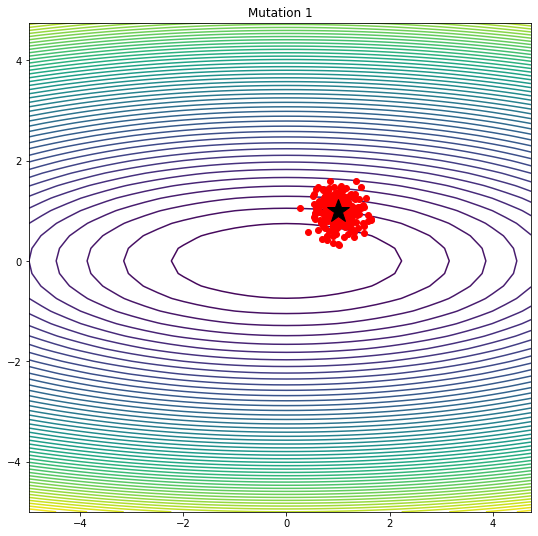

In [12]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [19]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

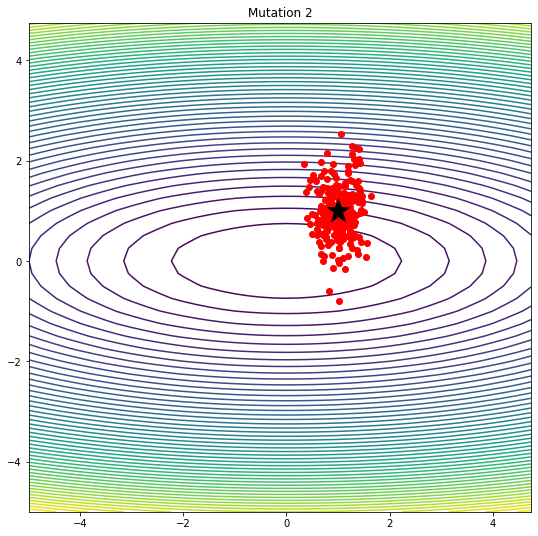

In [20]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [21]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

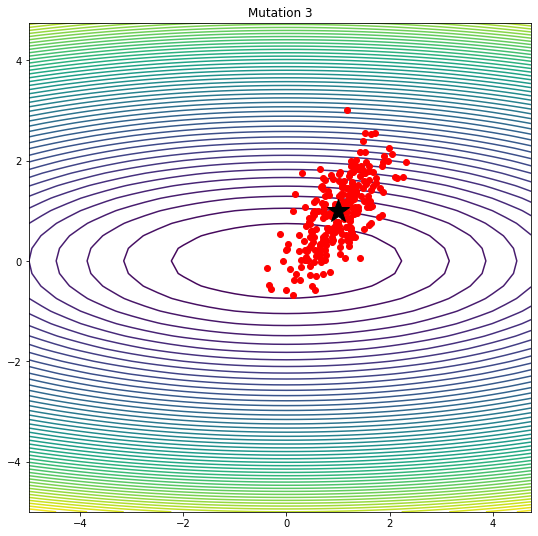

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [9]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, \
       tau_0, log_frequency=1, mutation_function=None, out_of_range_check=False, bounds=[0.0, 0.0]):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        if mutation_function == None:
            children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        
        else:
            children_population_solutions = mutation_function(children_population_solutions, children_population_sigmas, number_of_offspring, chromosome_length)
        
        if out_of_range_check:
            fixing_value = (bounds[1] - bounds[0]) / 10
            children_population_solutions=np.where(children_population_solutions >= bounds[0],
                                                  children_population_solutions,
                                                  bounds[0] + fixing_value * np.random.rand())
            children_population_solutions=np.where(children_population_solutions <= bounds[1],
                                                  children_population_solutions,
                                                  bounds[1] - fixing_value * np.random.rand())
        
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))
    
    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

10
Iteration 0000 : best score = -5444.23748083, mean score = -26249.23754427.
Iteration 0040 : best score = -0.00000022, mean score = -0.00000141.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.


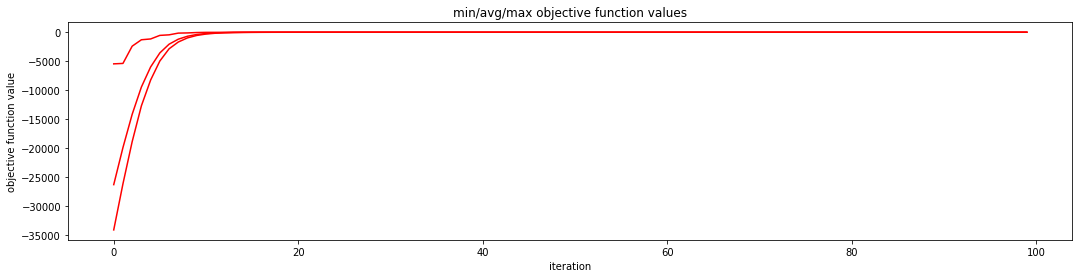

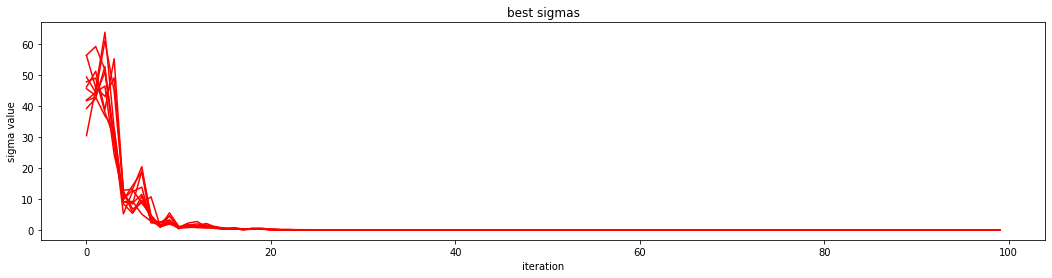

20
Iteration 0000 : best score = -22132.33294167, mean score = -59491.63259709.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.


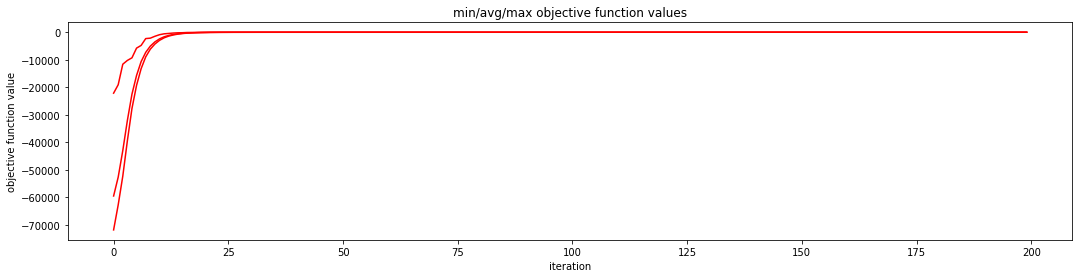

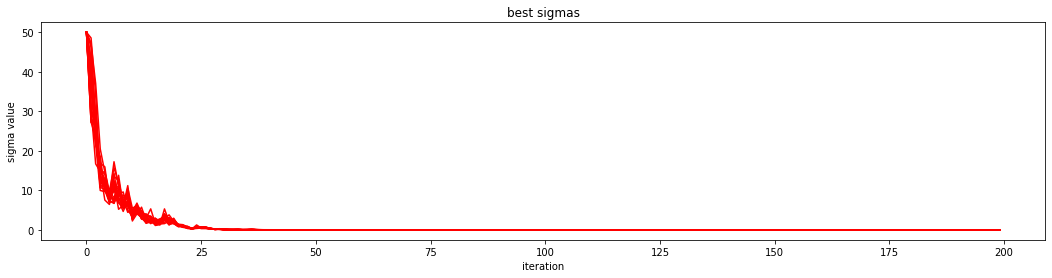

50
Iteration 0000 : best score = -95848.70426861, mean score = -161299.11211212.
Iteration 0200 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.


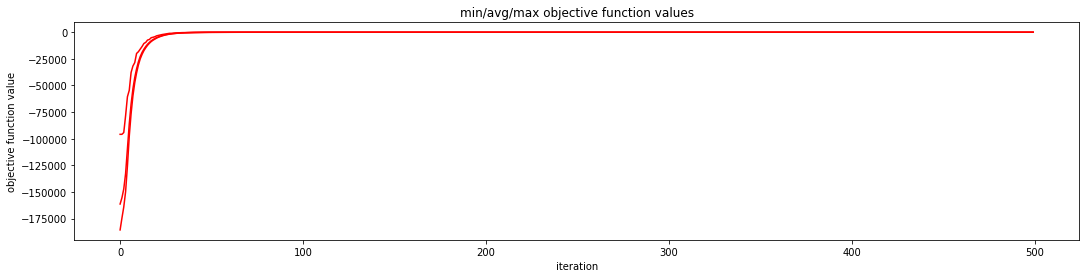

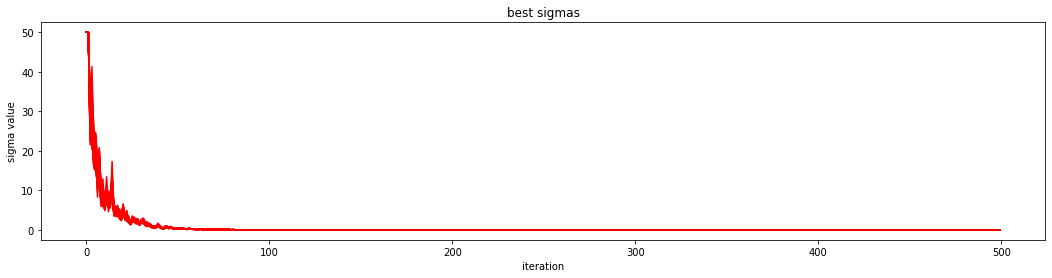

100
Iteration 0000 : best score = -223374.61497727, mean score = -330649.54126535.
Iteration 0400 : best score = -0.00000041, mean score = -0.00000048.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.


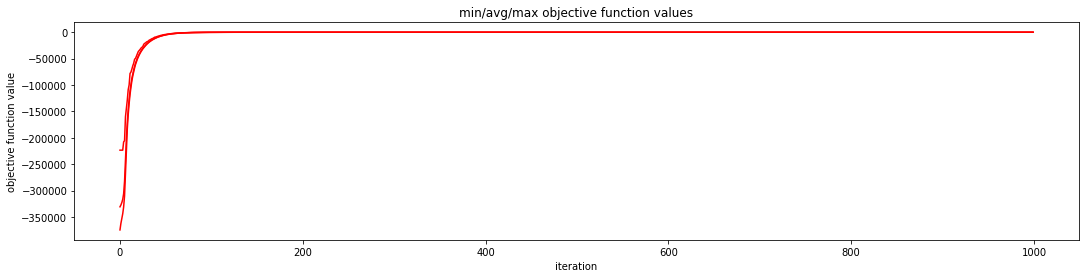

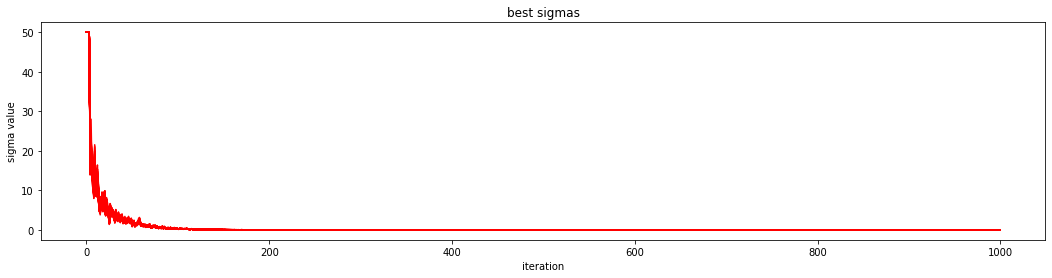

In [31]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, 10*d, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -5853.54915238, mean score = -24256.37592871.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000002.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.


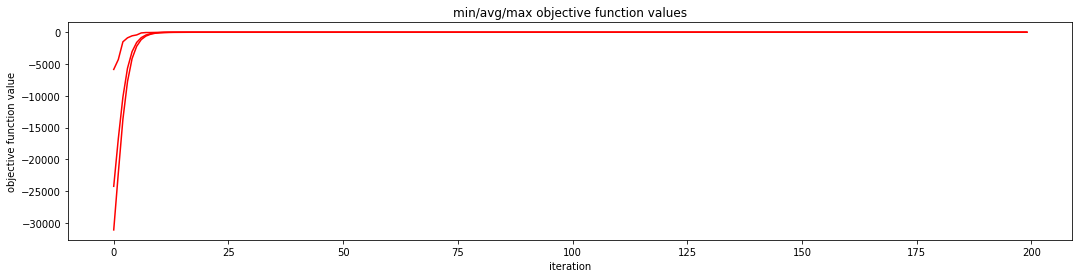

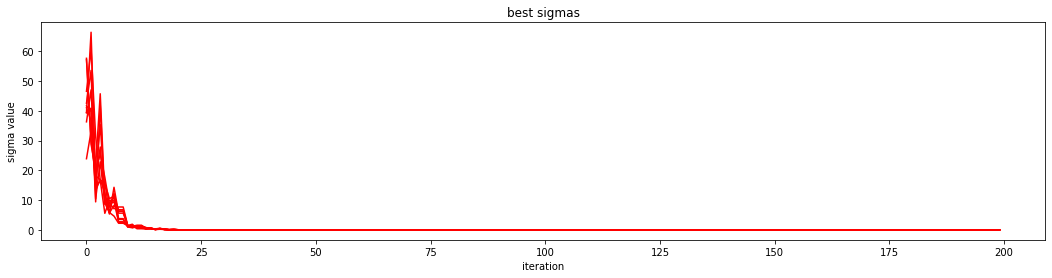

20
Iteration 0000 : best score = -26566.86567066, mean score = -57317.75498441.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0240 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0320 : best score = -0.00000000, mean score = -0.00000000.


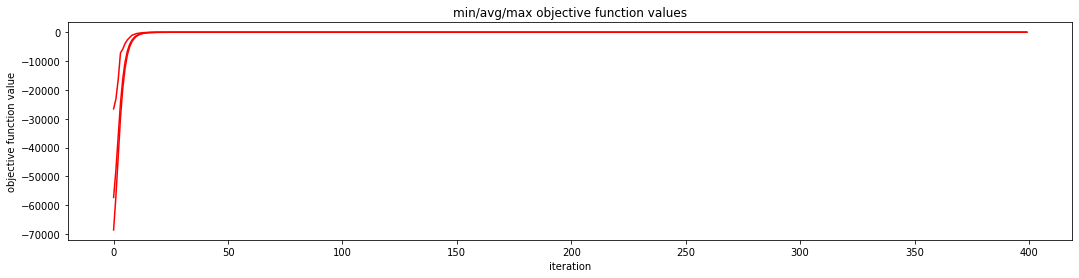

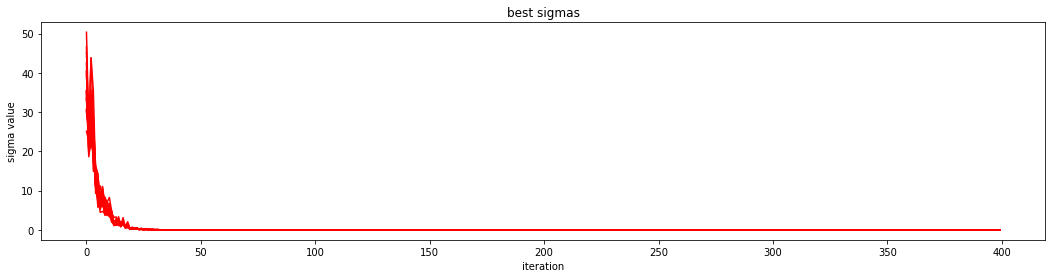

50
Iteration 0000 : best score = -105155.96953789, mean score = -158569.39208081.
Iteration 0200 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0600 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.


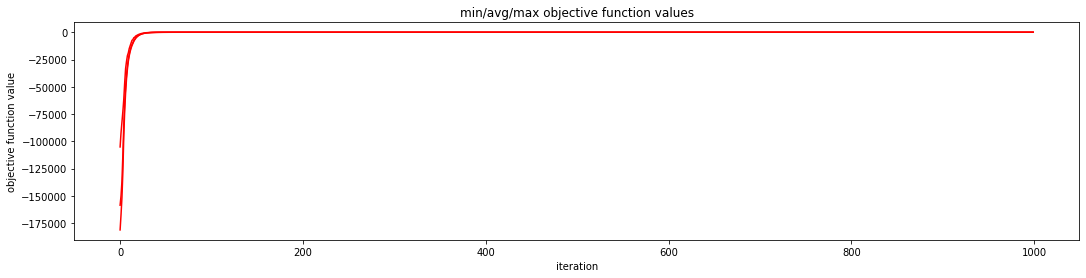

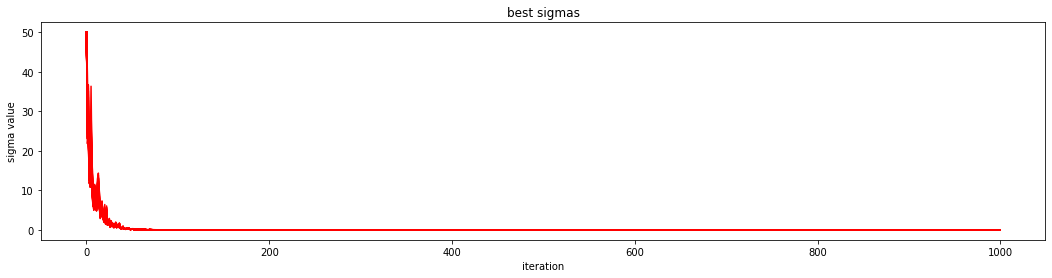

100
Iteration 0000 : best score = -243429.34382996, mean score = -328399.27086935.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1200 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1600 : best score = -0.00000000, mean score = -0.00000000.


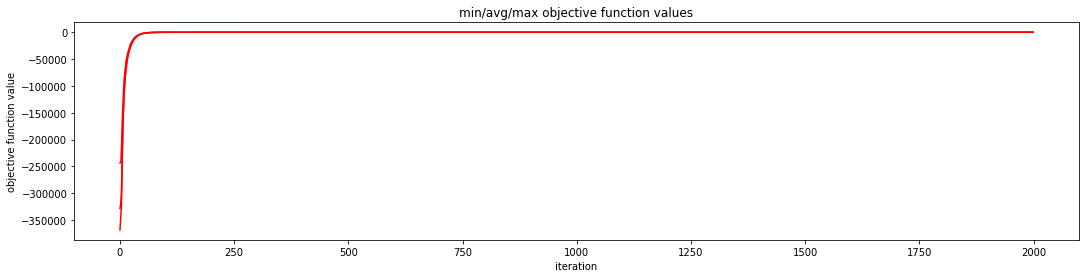

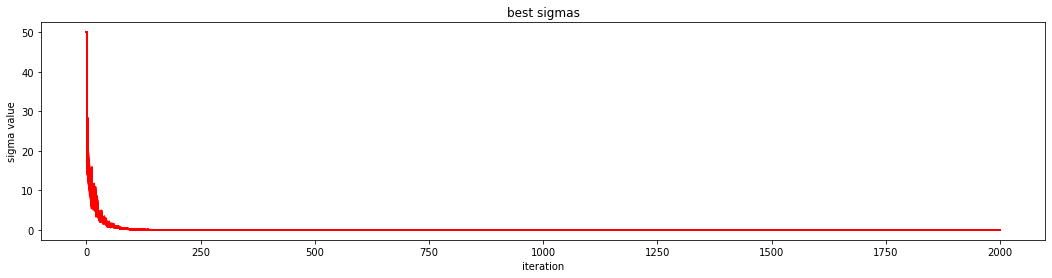

In [32]:
N = 1000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, 20*d, 3*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -4230.72269439, mean score = -28725.81260370.
Iteration 0040 : best score = -0.00065678, mean score = -0.00560772.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000000.


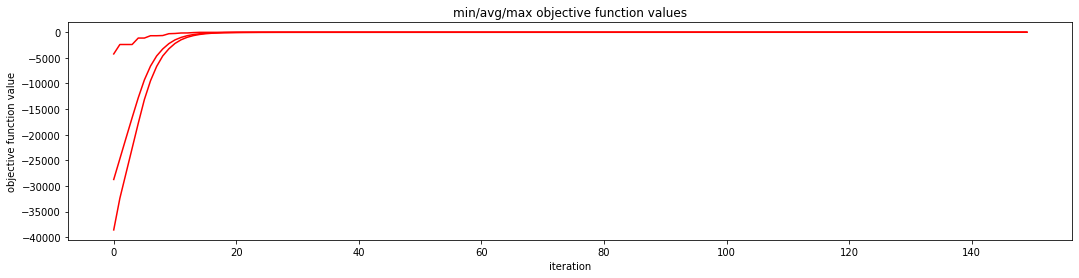

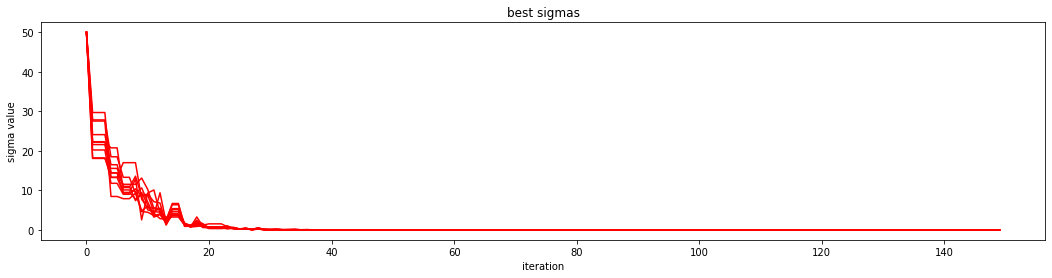

20
Iteration 0000 : best score = -21527.56222599, mean score = -62167.00858081.
Iteration 0080 : best score = -0.00013055, mean score = -0.00028822.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0240 : best score = -0.00000000, mean score = -0.00000000.


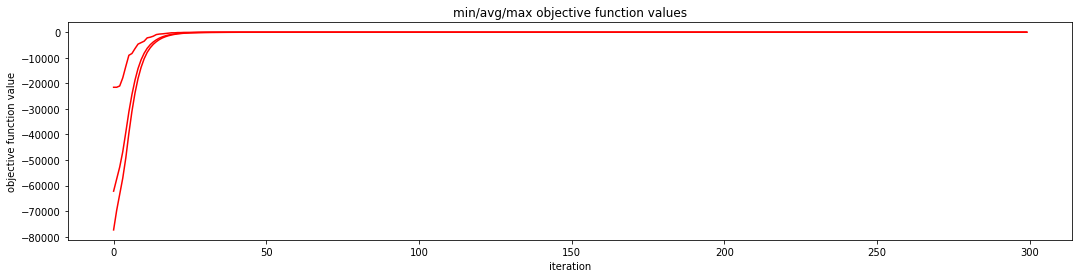

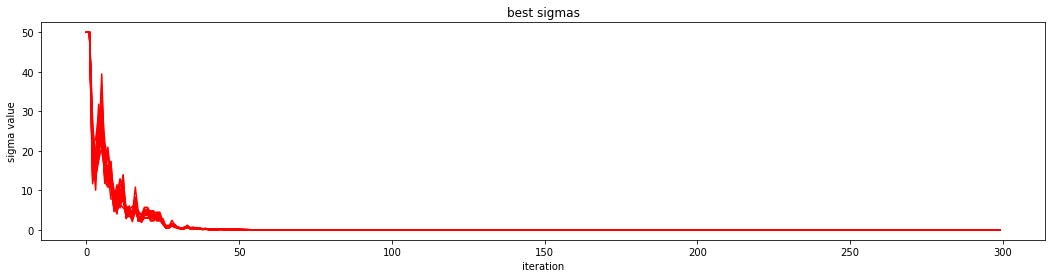

50
Iteration 0000 : best score = -96289.48275613, mean score = -161953.40028224.
Iteration 0200 : best score = -0.00067309, mean score = -0.00089066.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0600 : best score = -0.00000000, mean score = -0.00000000.


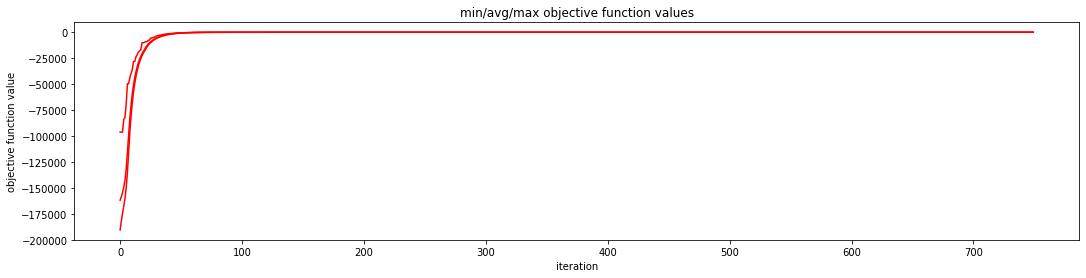

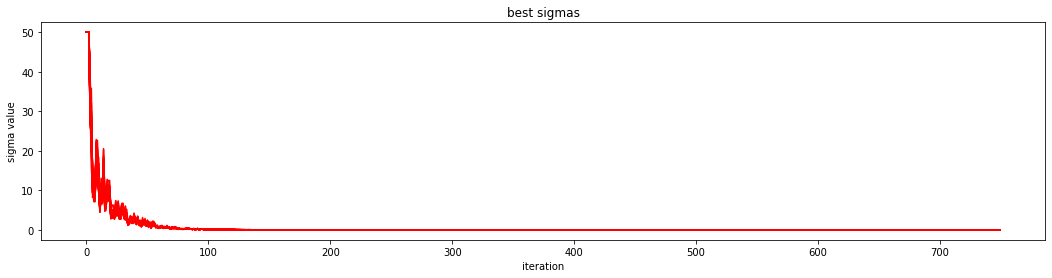

100
Iteration 0000 : best score = -220133.55389034, mean score = -330719.41929870.
Iteration 0400 : best score = -0.00415671, mean score = -0.00472323.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1200 : best score = -0.00000000, mean score = -0.00000000.


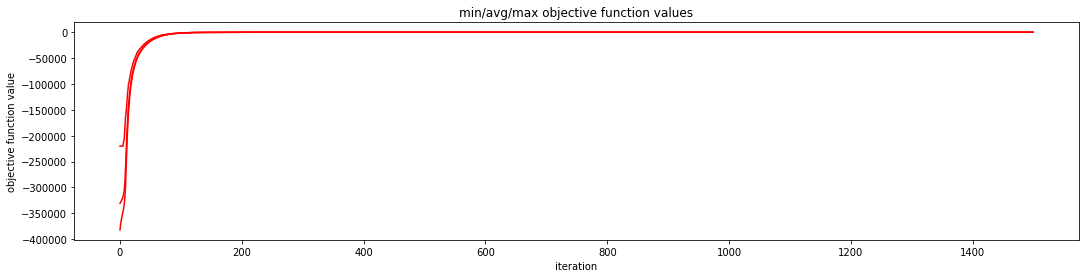

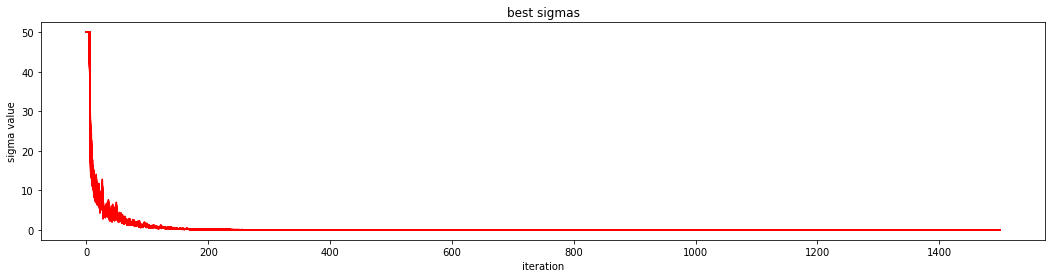

In [33]:
N = 2500

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, 15*d, N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -5411.90721418, mean score = -21184.31621359.
Iteration 0040 : best score = -0.00000077, mean score = -0.00000584.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.


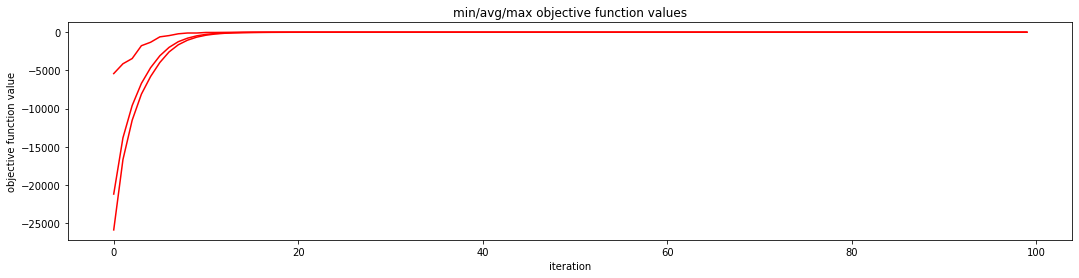

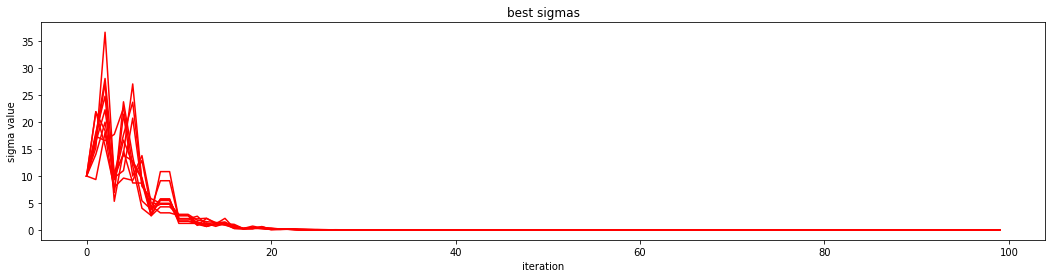

20
Iteration 0000 : best score = -25755.41709887, mean score = -48121.24241013.
Iteration 0080 : best score = -0.00000003, mean score = -0.00000008.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.


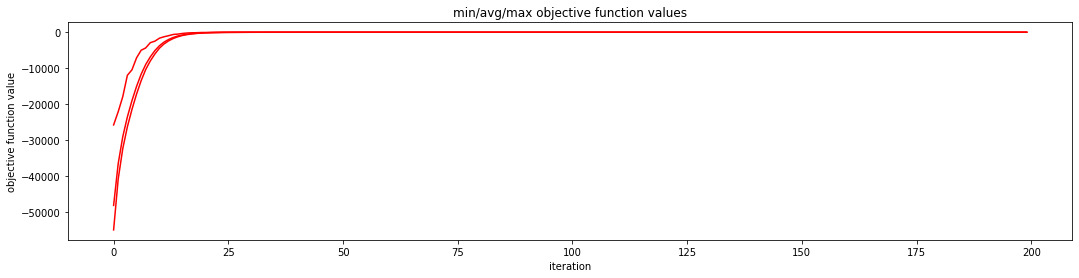

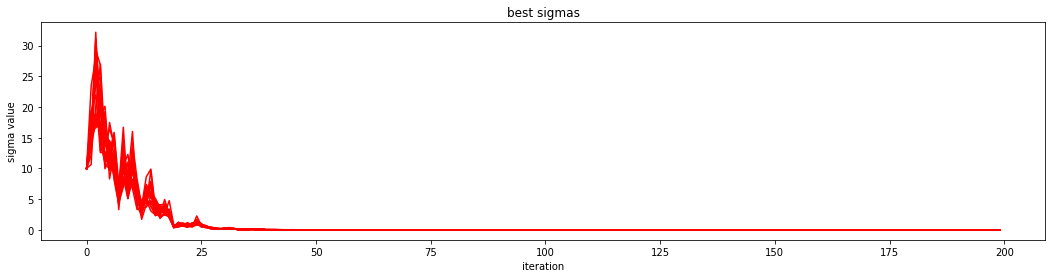

50
Iteration 0000 : best score = -89940.61182202, mean score = -130996.58021289.
Iteration 0200 : best score = -0.00000004, mean score = -0.00000006.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.


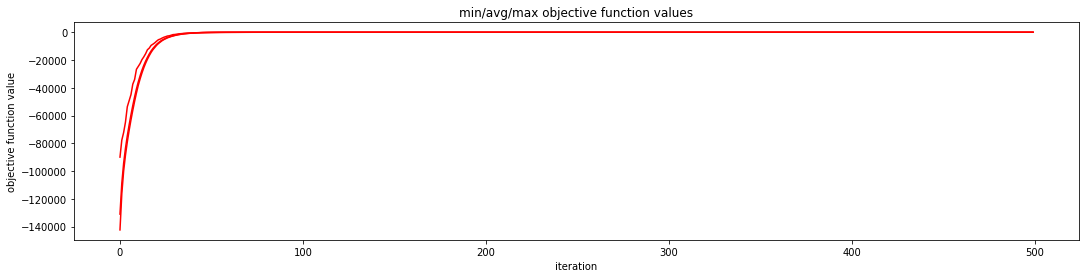

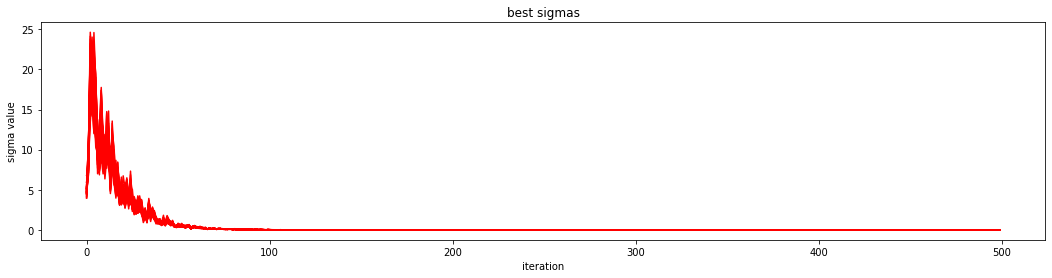

100
Iteration 0000 : best score = -220932.51812773, mean score = -274363.79319451.
Iteration 0400 : best score = -0.00000133, mean score = -0.00000153.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.


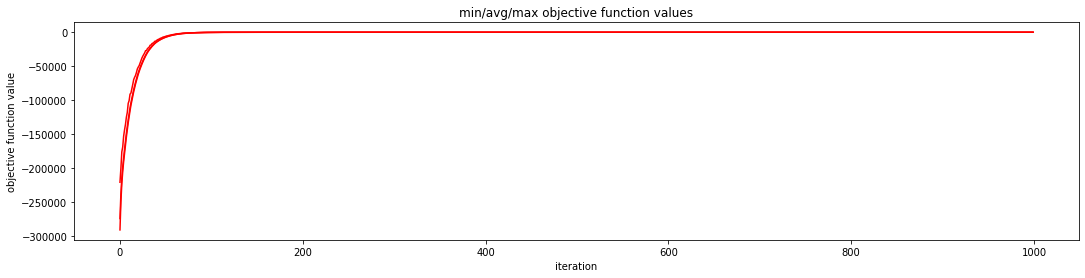

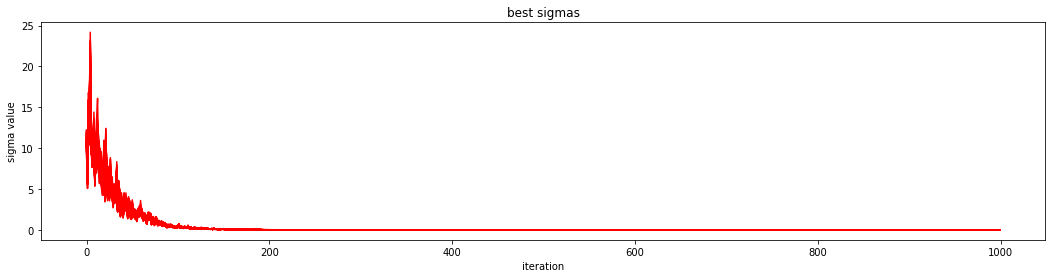

In [34]:
N = 2000
T = 100

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, 10*d, 2*N, 2, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

10
Iteration 0000 : best score = -6763.64823035, mean score = -26312.60616434.
Iteration 0040 : best score = -16.32146989, mean score = -55.57369456.
Iteration 0080 : best score = -0.00000728, mean score = -0.00004621.


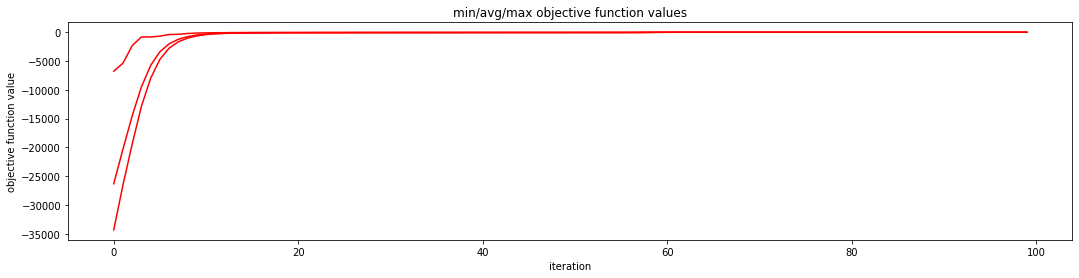

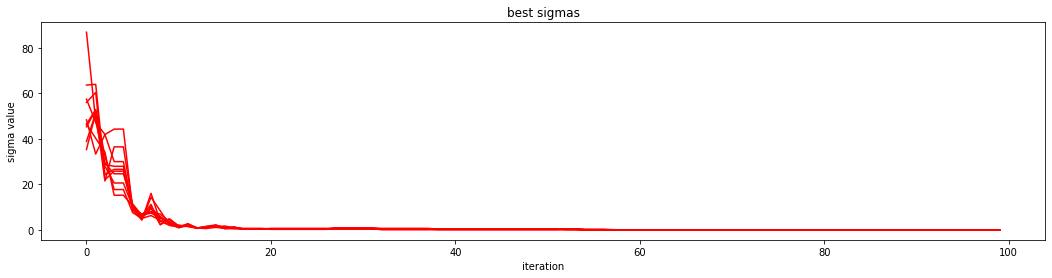

20
Iteration 0000 : best score = -21240.16424102, mean score = -59795.17293828.
Iteration 0080 : best score = -20.10912649, mean score = -29.79710946.
Iteration 0160 : best score = -16.91430397, mean score = -16.91430397.


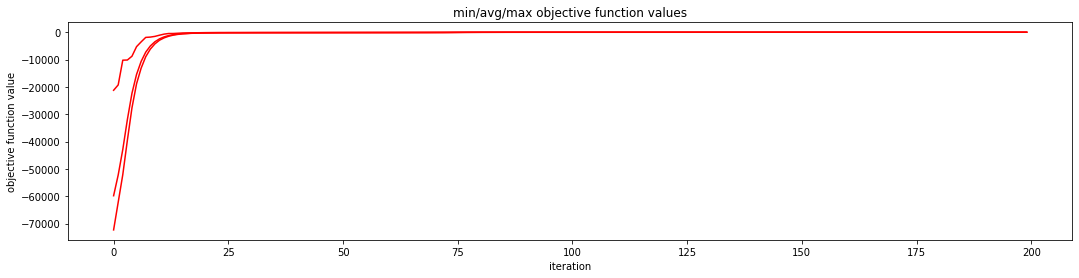

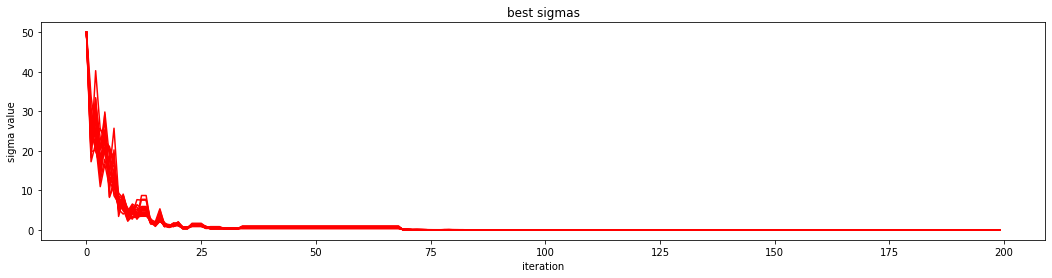

50
Iteration 0000 : best score = -94323.16462467, mean score = -160981.02324870.
Iteration 0200 : best score = -86.56138385, mean score = -86.56138791.
Iteration 0400 : best score = -86.56137248, mean score = -86.56137248.


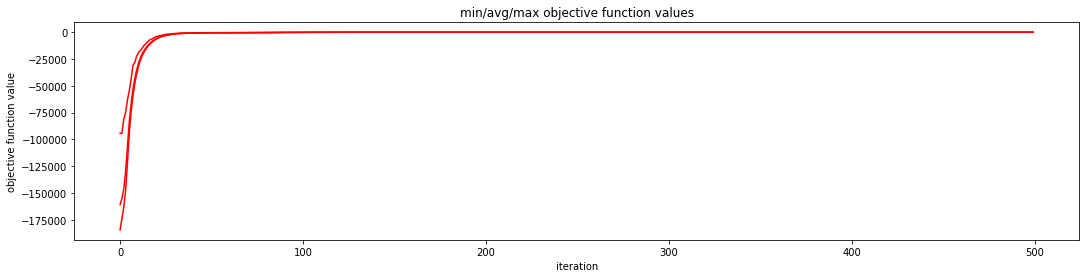

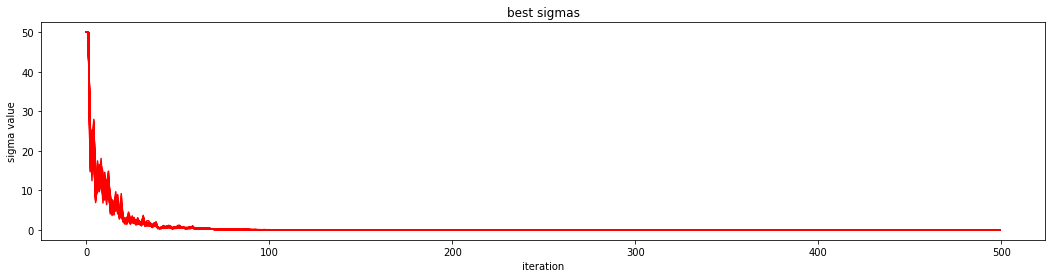

100
Iteration 0000 : best score = -242875.27694915, mean score = -331469.44108543.
Iteration 0400 : best score = -442.75579674, mean score = -442.75581033.
Iteration 0800 : best score = -442.75569559, mean score = -442.75569559.


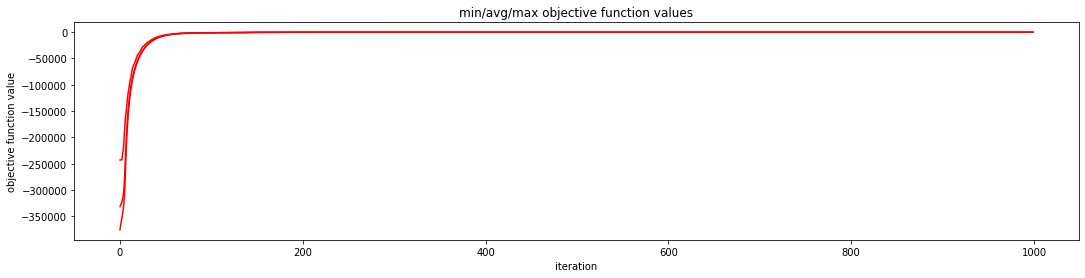

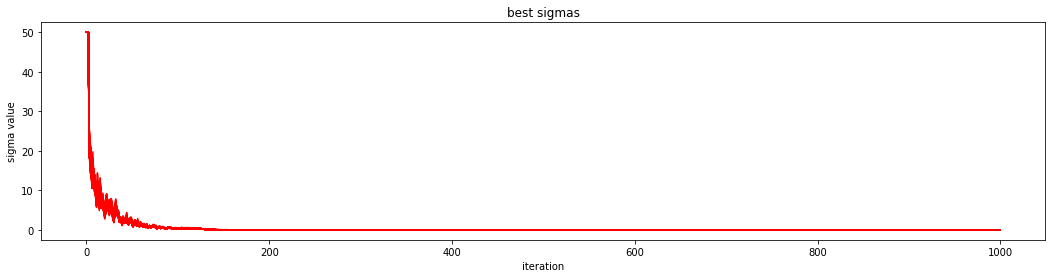

In [35]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, 10*d, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -7041.12505910, mean score = -25042.15260757.
Iteration 0040 : best score = -19.08674099, mean score = -50.46989992.
Iteration 0080 : best score = -0.99495906, mean score = -0.99495909.
Iteration 0120 : best score = -0.99495906, mean score = -0.99495906.
Iteration 0160 : best score = -0.99495906, mean score = -0.99495906.


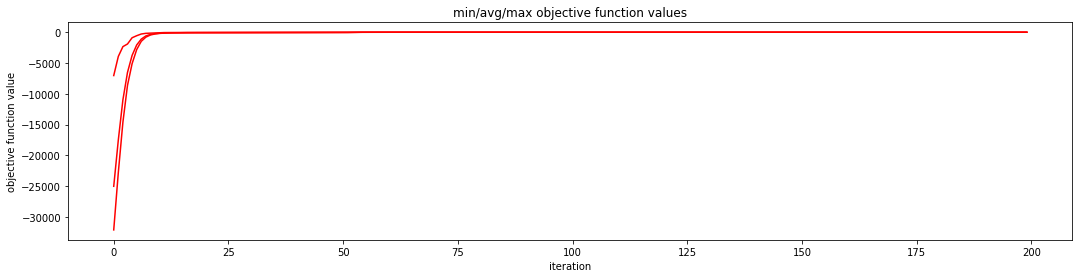

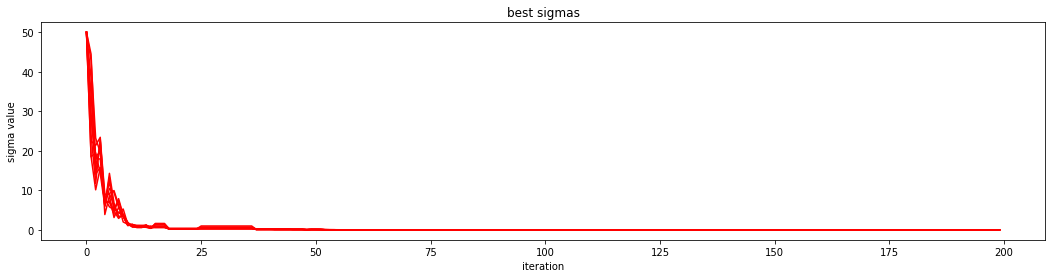

20
Iteration 0000 : best score = -28482.88320071, mean score = -58290.42499601.
Iteration 0080 : best score = -12.72781754, mean score = -18.16944702.
Iteration 0160 : best score = -8.95463151, mean score = -8.95463151.
Iteration 0240 : best score = -8.95463151, mean score = -8.95463151.
Iteration 0320 : best score = -8.95463151, mean score = -8.95463151.


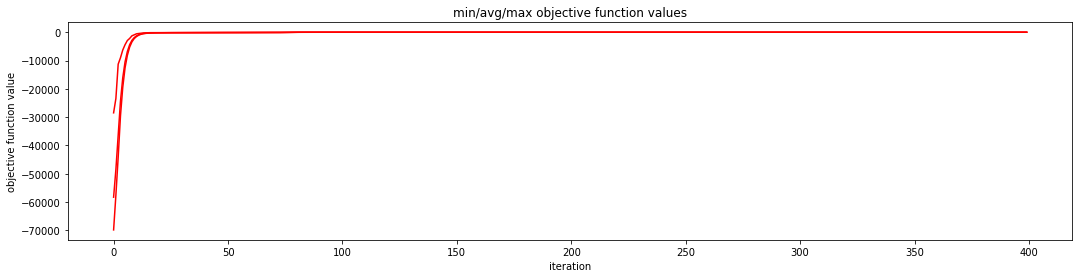

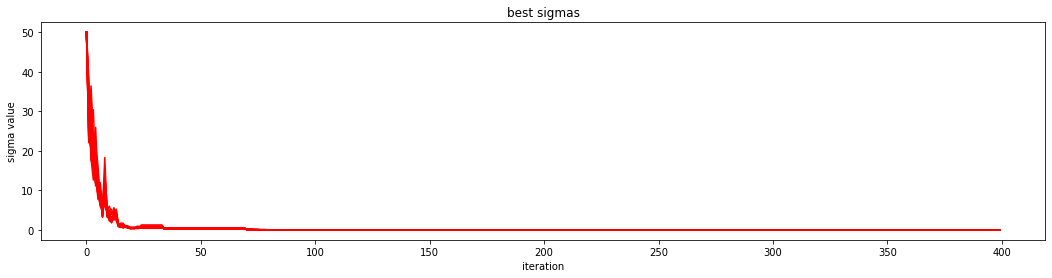

50
Iteration 0000 : best score = -104242.35560638, mean score = -159448.19616640.
Iteration 0200 : best score = -95.51598495, mean score = -95.51598517.
Iteration 0400 : best score = -95.51598384, mean score = -95.51598384.
Iteration 0600 : best score = -95.51598384, mean score = -95.51598384.
Iteration 0800 : best score = -95.51598384, mean score = -95.51598384.


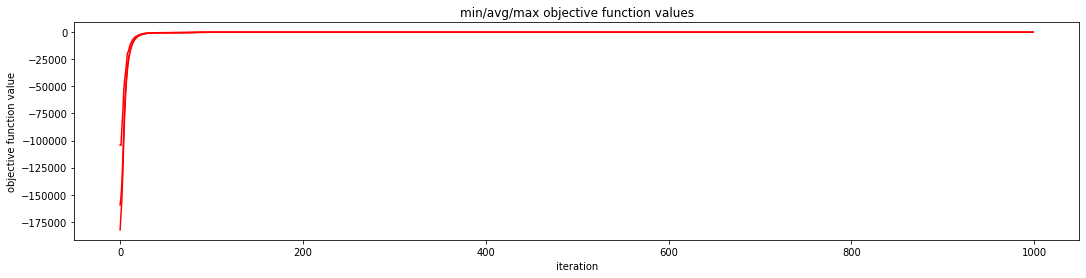

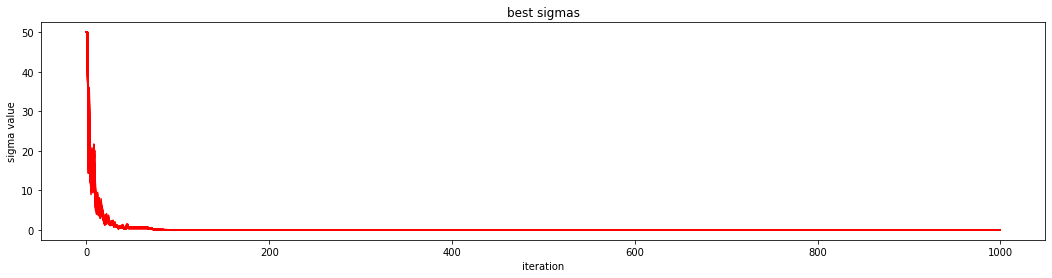

100
Iteration 0000 : best score = -237128.84809362, mean score = -330010.42231601.
Iteration 0400 : best score = -425.84124965, mean score = -425.84124967.
Iteration 0800 : best score = -425.84124947, mean score = -425.84124947.
Iteration 1200 : best score = -425.84124947, mean score = -425.84124947.
Iteration 1600 : best score = -425.84124947, mean score = -425.84124947.


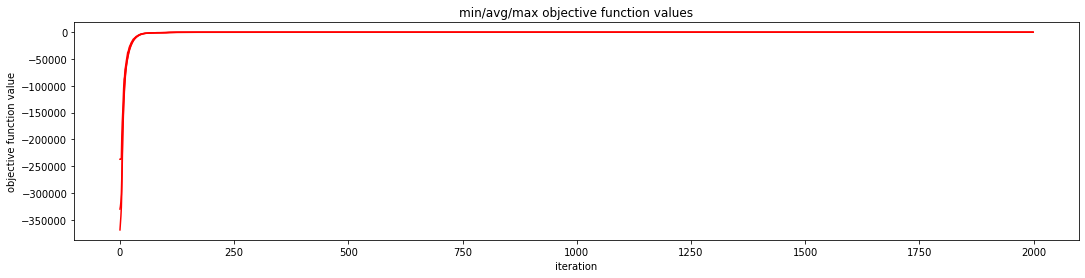

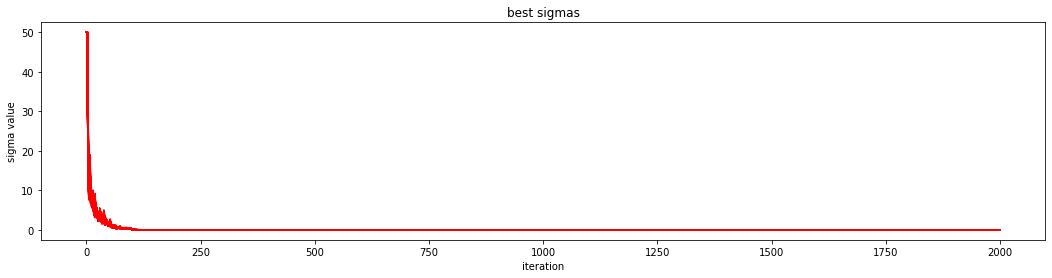

In [36]:
N = 1000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, 20*d, 3*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -6900.42216078, mean score = -28860.68296085.
Iteration 0040 : best score = -31.60705943, mean score = -67.65815262.
Iteration 0080 : best score = -20.17234977, mean score = -53.69522545.
Iteration 0120 : best score = -0.05570570, mean score = -0.56362947.


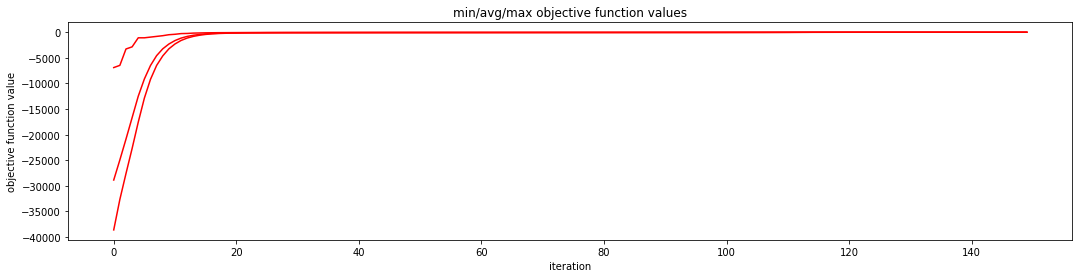

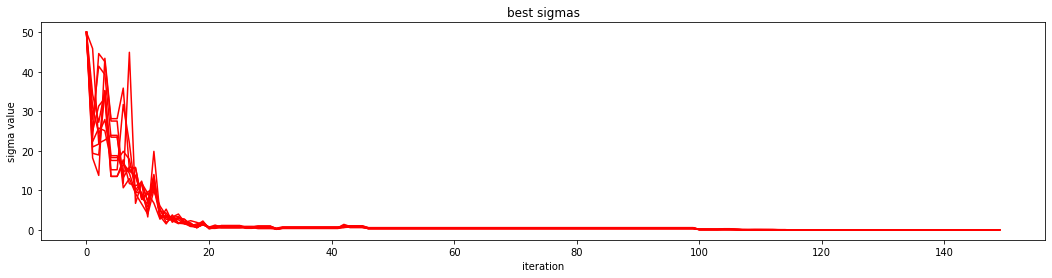

20
Iteration 0000 : best score = -25279.16224259, mean score = -62207.21132748.
Iteration 0080 : best score = -84.59200162, mean score = -148.04545778.
Iteration 0160 : best score = -17.90945072, mean score = -17.90971391.
Iteration 0240 : best score = -17.90926303, mean score = -17.90926303.


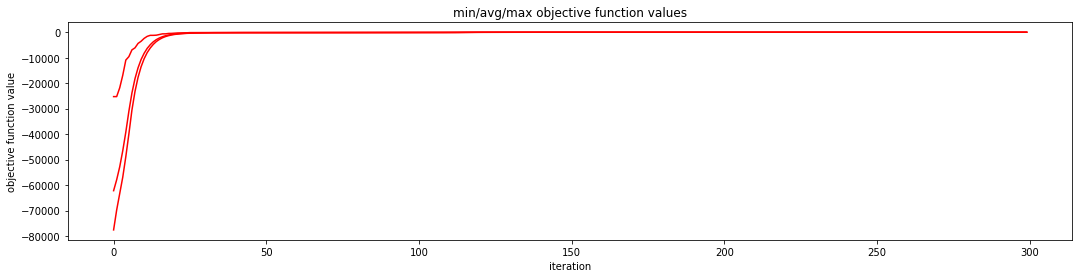

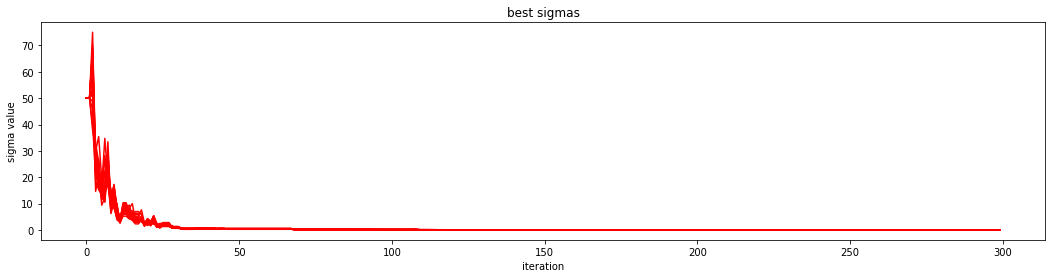

50
Iteration 0000 : best score = -91614.65956075, mean score = -162684.61541197.
Iteration 0200 : best score = -125.37567659, mean score = -129.57362323.
Iteration 0400 : best score = -120.38990988, mean score = -120.38990989.
Iteration 0600 : best score = -120.38990984, mean score = -120.38990984.


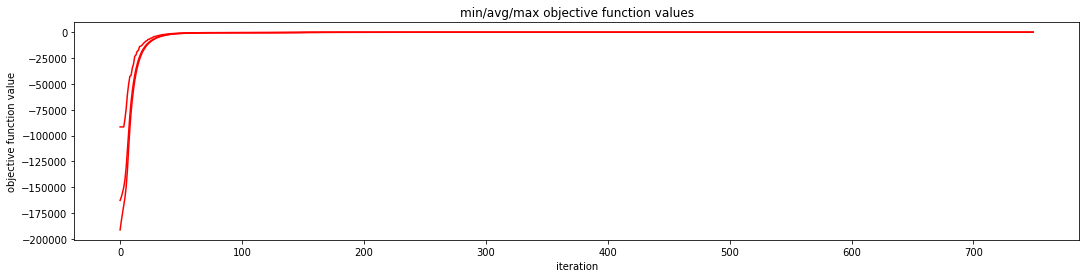

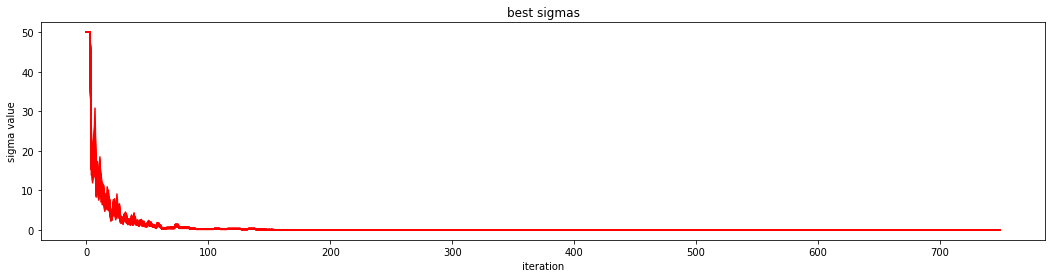

100
Iteration 0000 : best score = -245231.30325996, mean score = -331852.55690564.
Iteration 0400 : best score = -410.98954587, mean score = -411.00702406.
Iteration 0800 : best score = -410.91727872, mean score = -410.91727873.
Iteration 1200 : best score = -410.91727872, mean score = -410.91727872.


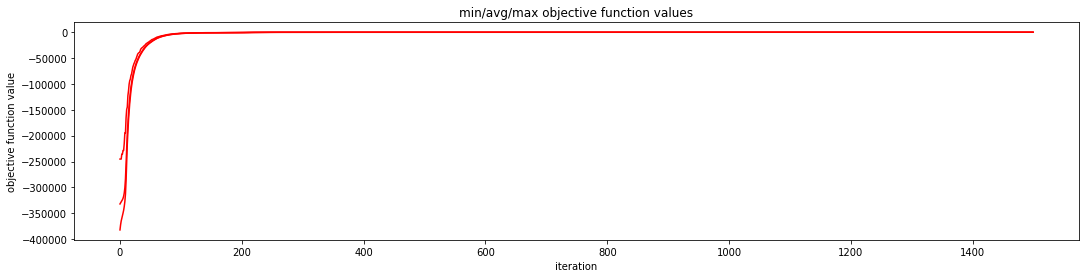

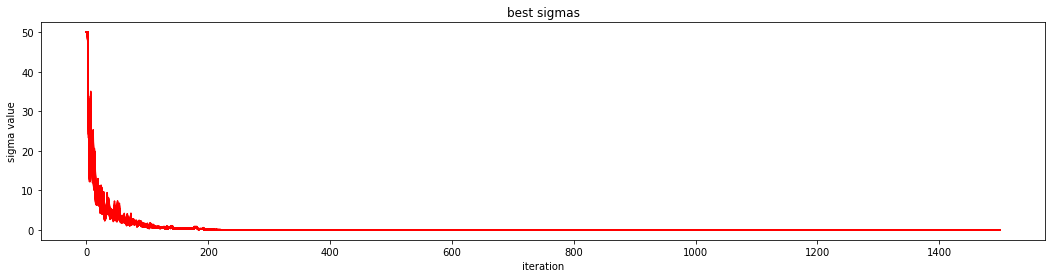

In [37]:
N = 2500

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, 15*d, N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -6178.53231861, mean score = -21249.04707331.
Iteration 0040 : best score = -23.15285666, mean score = -56.38111803.
Iteration 0080 : best score = -0.00000390, mean score = -0.00002230.


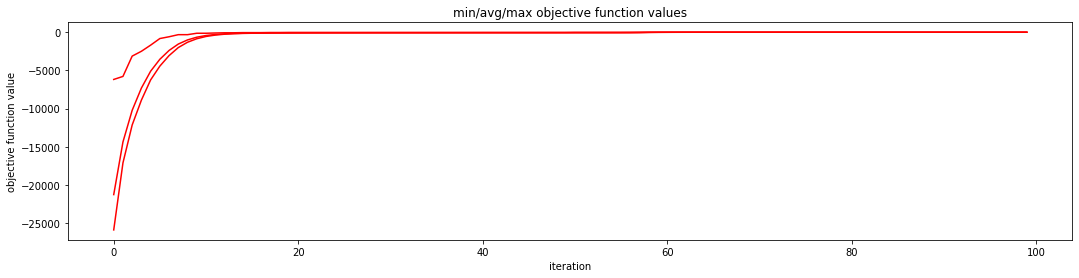

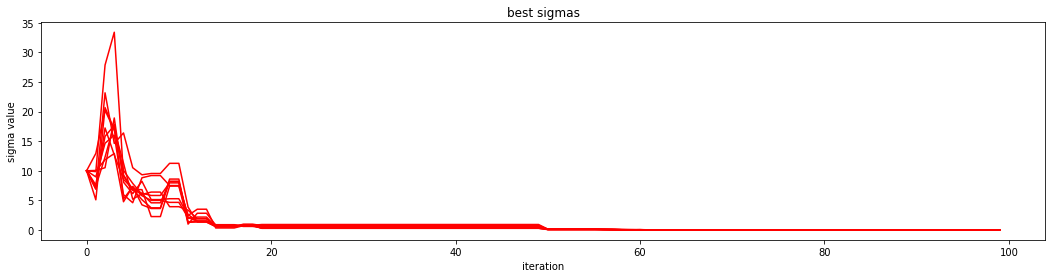

20
Iteration 0000 : best score = -22820.10603672, mean score = -47906.89378354.
Iteration 0080 : best score = -18.16969922, mean score = -18.63485733.
Iteration 0160 : best score = -17.90926303, mean score = -17.90926303.


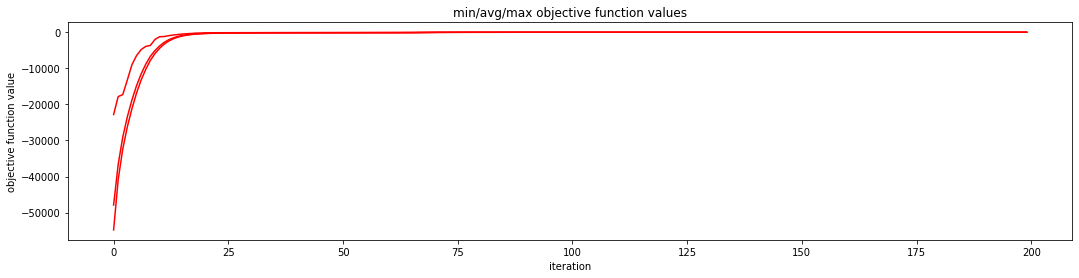

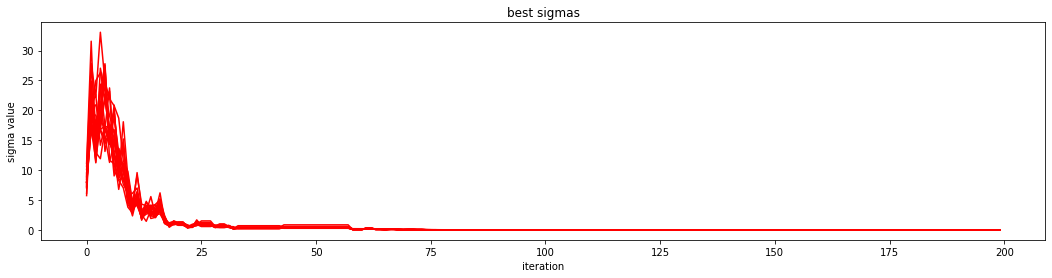

50
Iteration 0000 : best score = -95274.32283060, mean score = -132466.58259698.
Iteration 0200 : best score = -112.43027501, mean score = -112.43028113.
Iteration 0400 : best score = -112.43026262, mean score = -112.43026262.


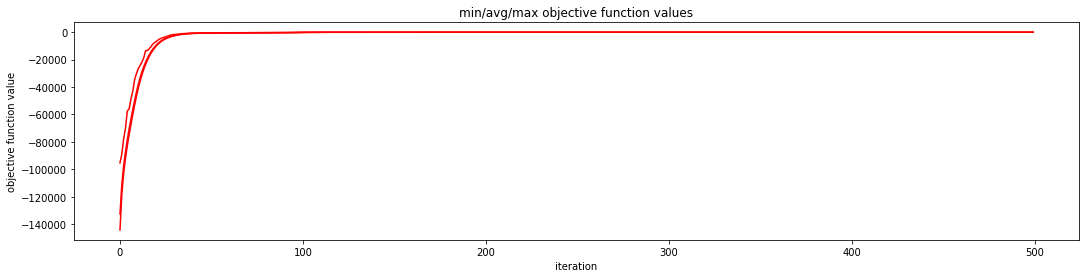

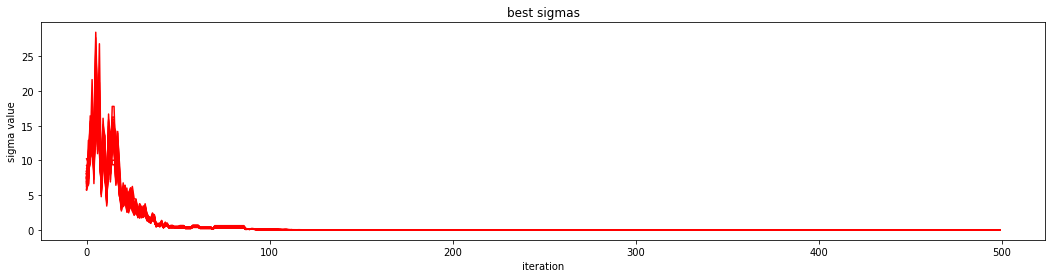

100
Iteration 0000 : best score = -218639.12535864, mean score = -274685.38870613.
Iteration 0400 : best score = -404.94746145, mean score = -404.94746265.
Iteration 0800 : best score = -404.94745348, mean score = -404.94745348.


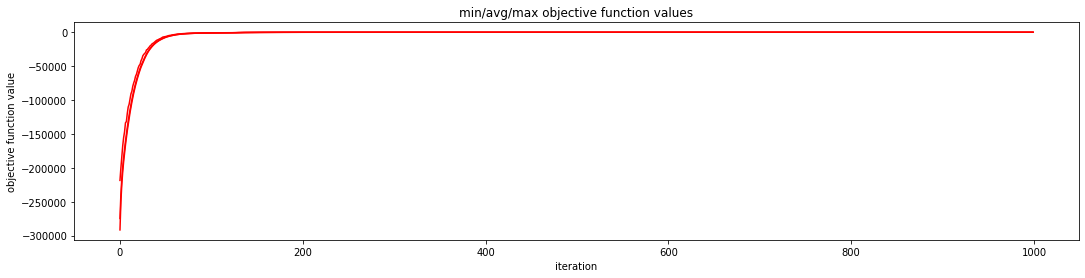

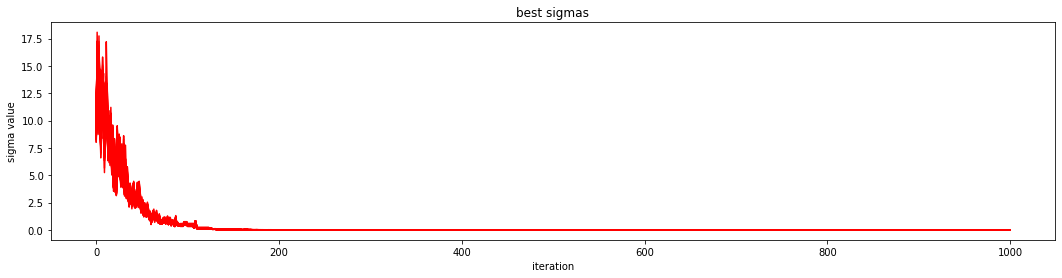

In [38]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, 10*d, 2*N, 2, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7

10
Iteration 0000 : best score = -2877.76171983, mean score = -3967.28362200.
Iteration 0040 : best score = -1.13342519, mean score = -1081.21527364.
Iteration 0080 : best score = -1.13342519, mean score = -829.12888530.
Iteration 0120 : best score = -1.13342519, mean score = -726.69864623.
Iteration 0160 : best score = -1.13342519, mean score = -651.87391149.


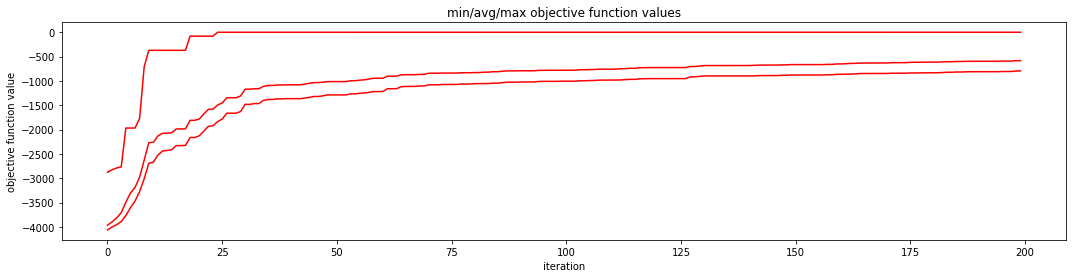

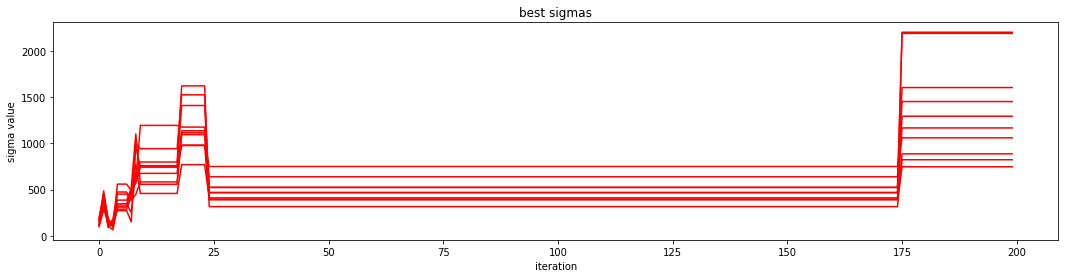

20
Iteration 0000 : best score = -7311.54992861, mean score = -8028.21982124.
Iteration 0080 : best score = -838.71822495, mean score = -2891.60588258.
Iteration 0160 : best score = -720.80109375, mean score = -2156.06733280.
Iteration 0240 : best score = -574.75113004, mean score = -1918.54356082.
Iteration 0320 : best score = -574.75113004, mean score = -1816.08516522.


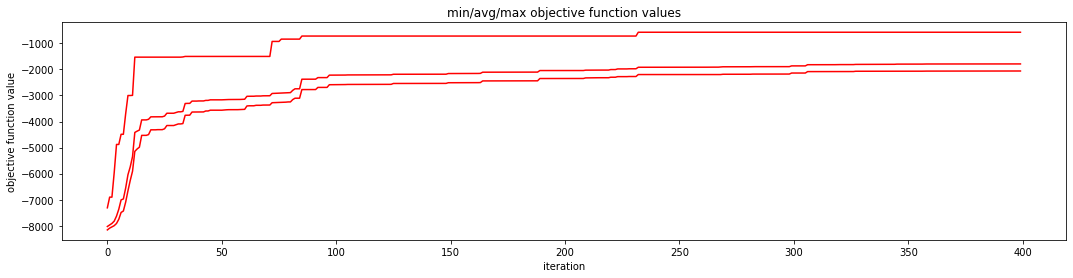

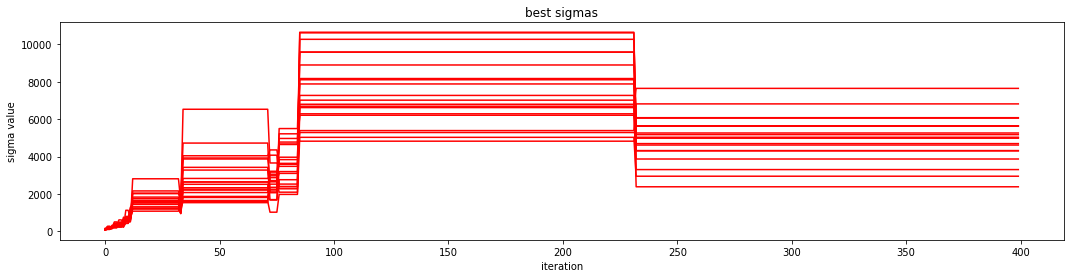

50
Iteration 0000 : best score = -19180.79682240, mean score = -20241.82835580.
Iteration 0200 : best score = -5364.19473190, mean score = -8044.81539316.
Iteration 0400 : best score = -4504.79260088, mean score = -6911.46721874.
Iteration 0600 : best score = -4051.53698446, mean score = -6128.06366829.
Iteration 0800 : best score = -3972.66277969, mean score = -5744.51160396.


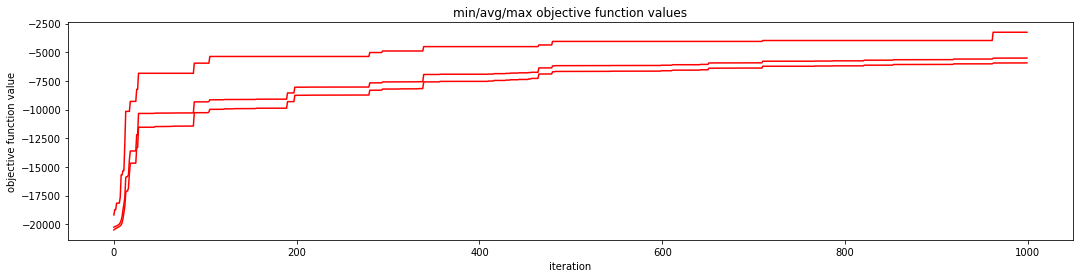

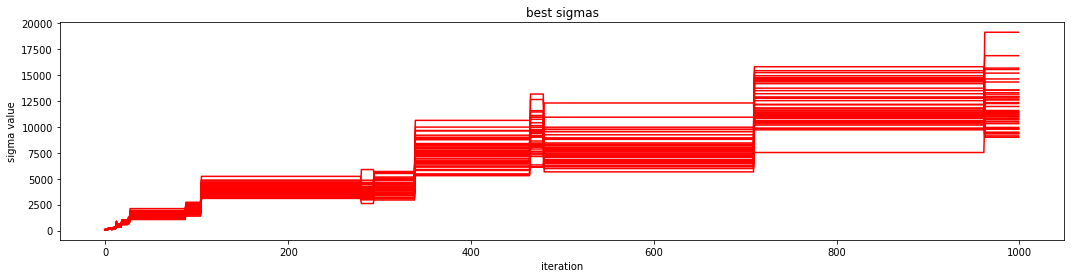

100
Iteration 0000 : best score = -39518.64111867, mean score = -40603.61986206.
Iteration 0400 : best score = -35534.79180486, mean score = -35534.79180486.
Iteration 0800 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 1200 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 1600 : best score = -35534.79180484, mean score = -35534.79180484.


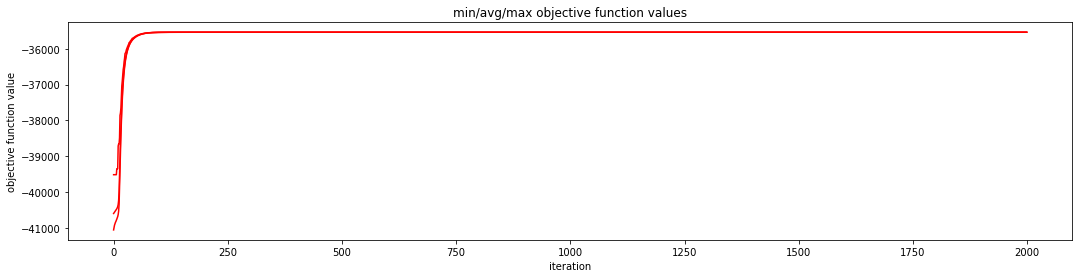

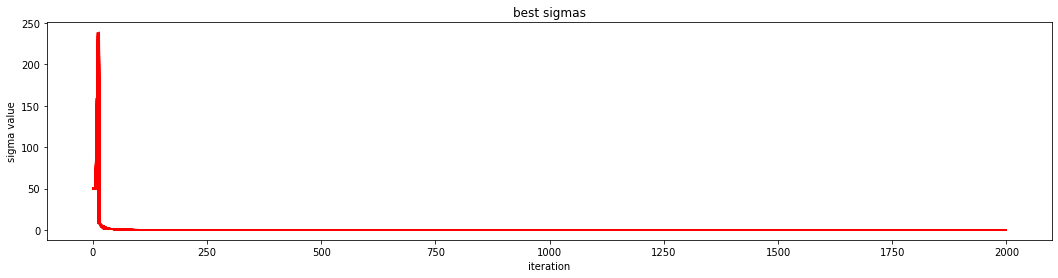

In [24]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F7, d, N, 20*d, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d, out_of_range_check=True, bounds=[-500.0, 500.0])
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -3496.84185338, mean score = -3948.87506381.
Iteration 0040 : best score = -9.02989150, mean score = -1100.14705008.
Iteration 0080 : best score = -0.61142743, mean score = -789.37091872.
Iteration 0120 : best score = -0.00028130, mean score = -637.27638310.
Iteration 0160 : best score = -0.00028130, mean score = -544.31534242.


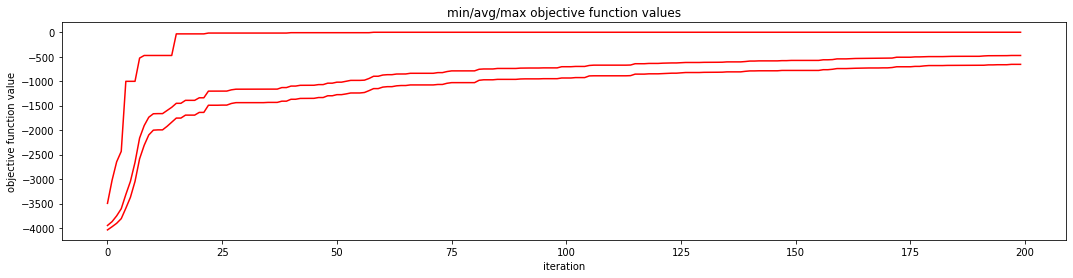

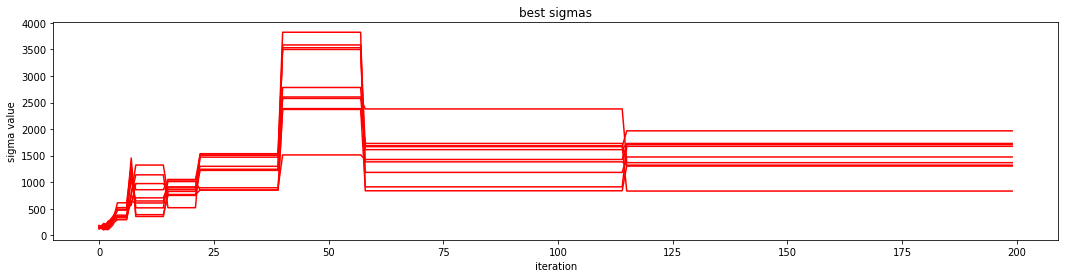

20
Iteration 0000 : best score = -7494.32822767, mean score = -8010.30071336.
Iteration 0080 : best score = -1331.09212287, mean score = -2440.86590283.
Iteration 0160 : best score = -830.57965279, mean score = -2093.21123997.
Iteration 0240 : best score = -830.57965279, mean score = -1898.86162639.
Iteration 0320 : best score = -574.32827894, mean score = -1778.30274660.


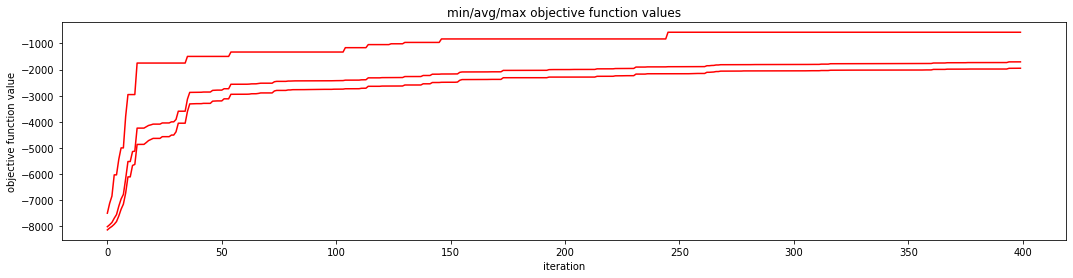

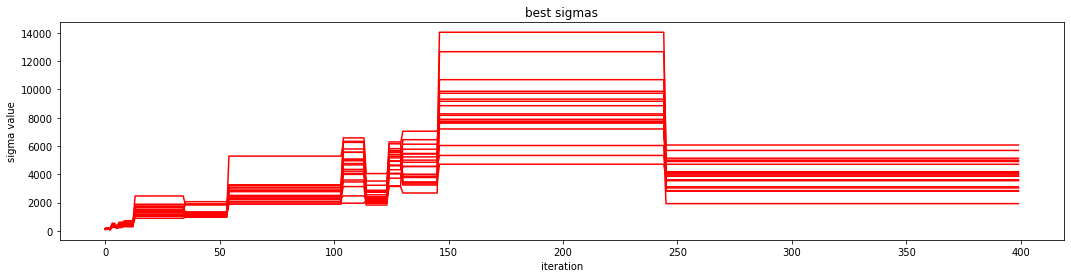

50
Iteration 0000 : best score = -19610.59302783, mean score = -20223.31156575.
Iteration 0200 : best score = -4598.80050080, mean score = -6554.53080669.
Iteration 0400 : best score = -4100.66750462, mean score = -5819.24235075.
Iteration 0600 : best score = -3614.49118671, mean score = -5468.85556473.
Iteration 0800 : best score = -3614.49118671, mean score = -5155.10151551.


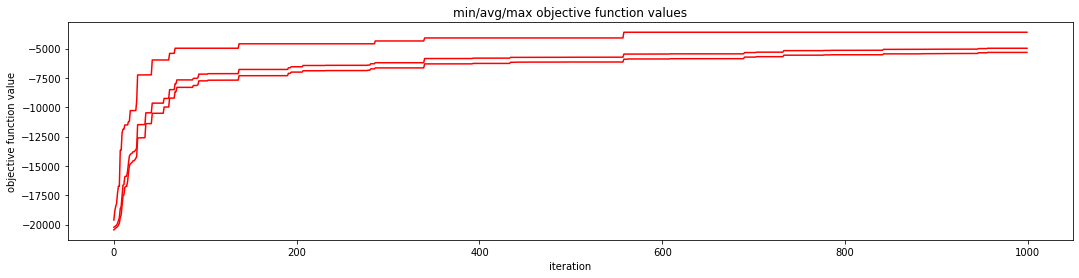

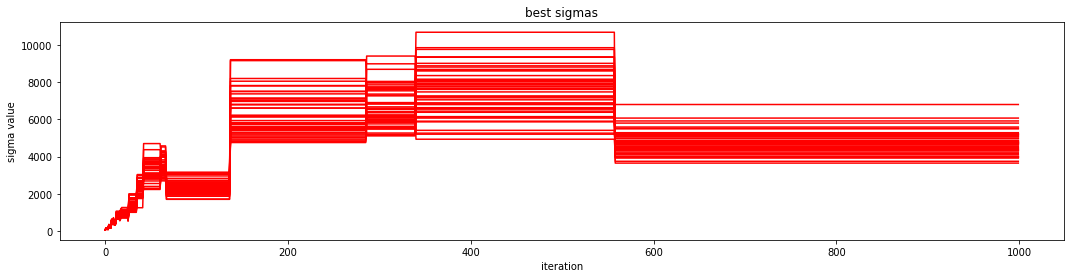

100
Iteration 0000 : best score = -39682.34514838, mean score = -40603.62808417.
Iteration 0400 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 0800 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 1200 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 1600 : best score = -35534.79180484, mean score = -35534.79180484.


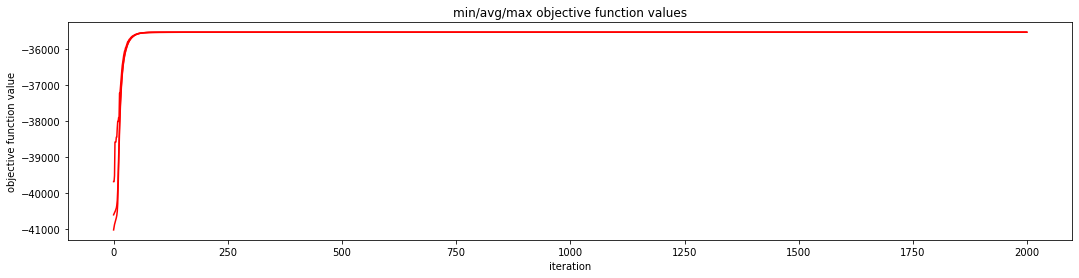

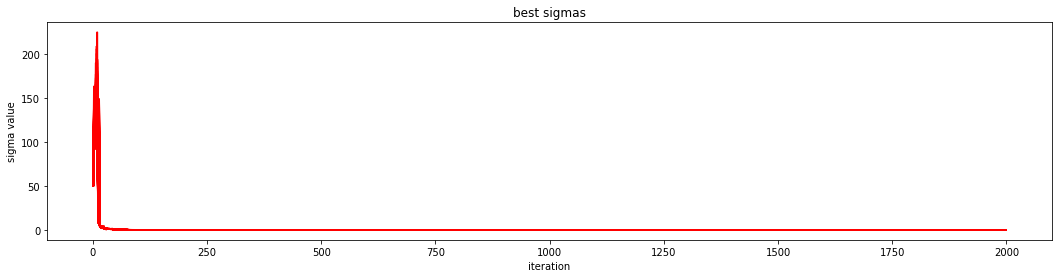

In [25]:
N = 1000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F7, d, N, 20*d, 3*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d, out_of_range_check=True, bounds=[-500.0, 500.0])

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -3350.52580707, mean score = -4002.00838457.
Iteration 0040 : best score = -1.30957501, mean score = -1450.96749995.
Iteration 0080 : best score = -1.30957501, mean score = -1084.11213390.
Iteration 0120 : best score = -0.01669517, mean score = -887.02630726.


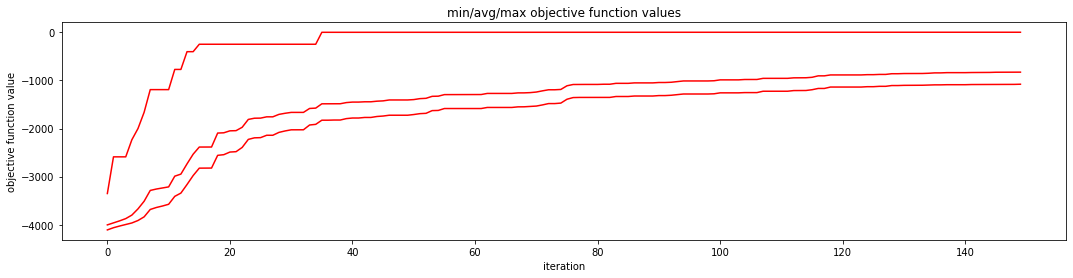

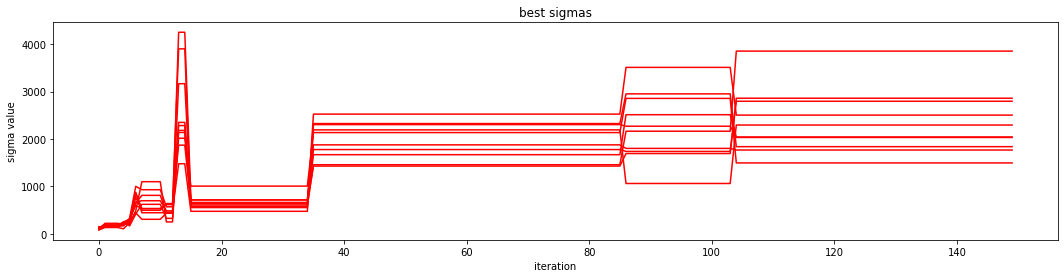

20
Iteration 0000 : best score = -7461.51331381, mean score = -8066.71404146.
Iteration 0080 : best score = -1093.93941183, mean score = -3572.22417891.
Iteration 0160 : best score = -1093.93941183, mean score = -2855.47501386.
Iteration 0240 : best score = -943.78278286, mean score = -2419.07201103.


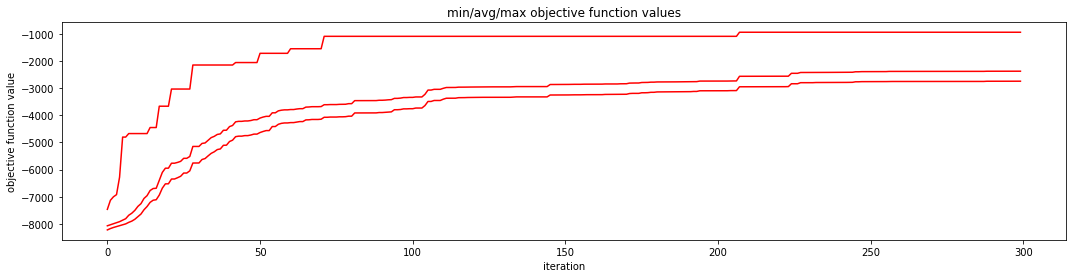

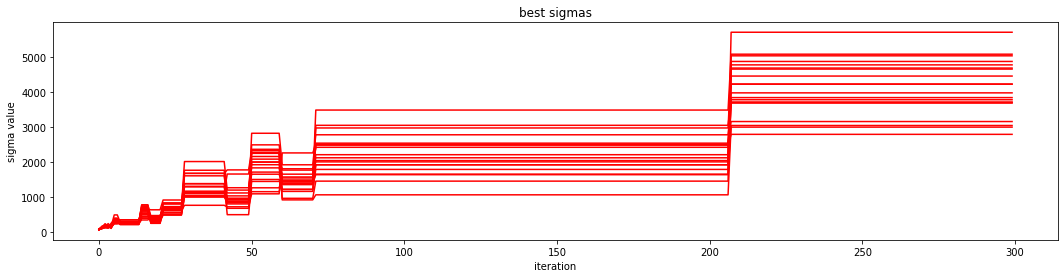

50
Iteration 0000 : best score = -19465.42943782, mean score = -20273.02444000.
Iteration 0200 : best score = -4543.42528834, mean score = -7371.82739386.
Iteration 0400 : best score = -4328.66090713, mean score = -6612.23862524.
Iteration 0600 : best score = -3718.48770567, mean score = -5891.12512547.


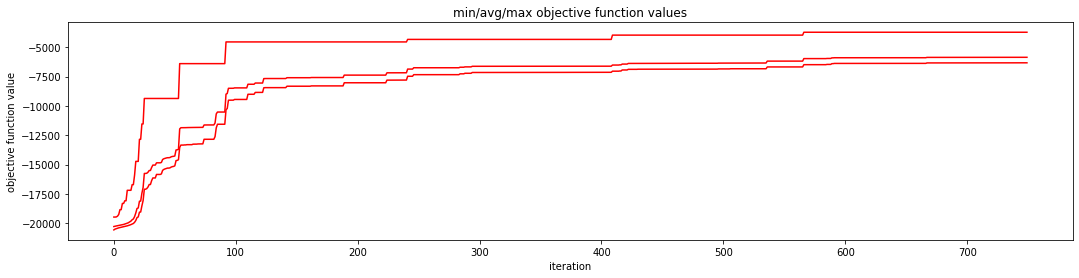

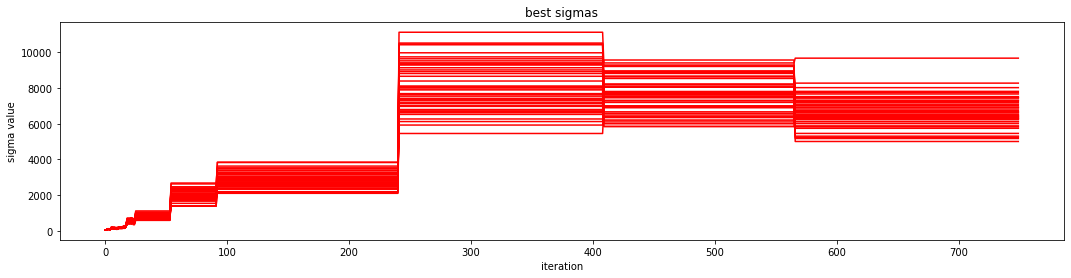

100
Iteration 0000 : best score = -39665.69447539, mean score = -40626.12078738.
Iteration 0400 : best score = -35534.79185550, mean score = -35534.79186403.
Iteration 0800 : best score = -35534.79180484, mean score = -35534.79180484.
Iteration 1200 : best score = -35534.79180484, mean score = -35534.79180484.


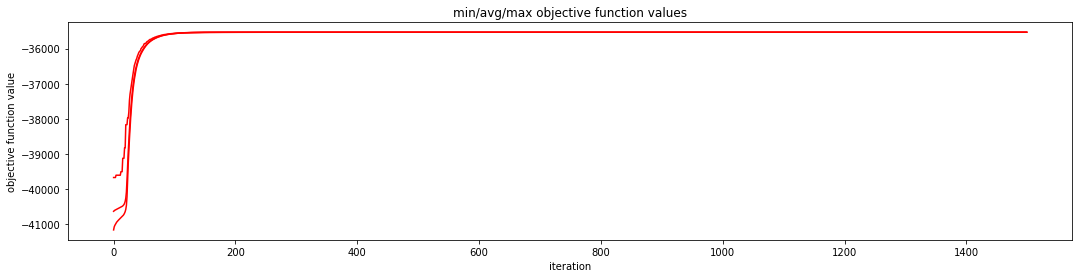

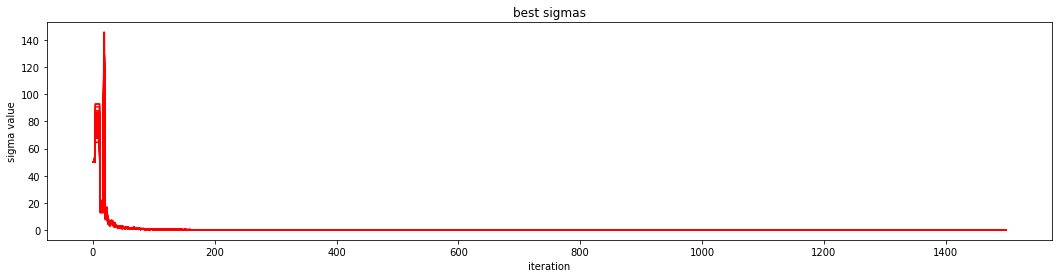

In [39]:
N = 2500

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F7, d, N, 15*d, N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d, out_of_range_check=True, bounds=[-500.0, 500.0])

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -3655.95875534, mean score = -3888.53884011.
Iteration 0040 : best score = -3553.47918049, mean score = -3553.47918050.
Iteration 0080 : best score = -3553.47918048, mean score = -3553.47918048.


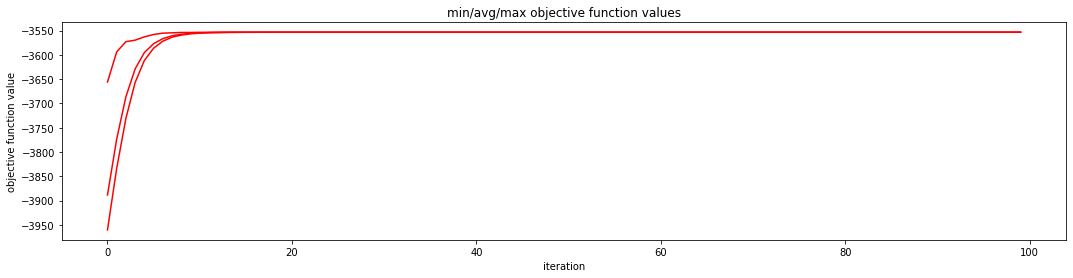

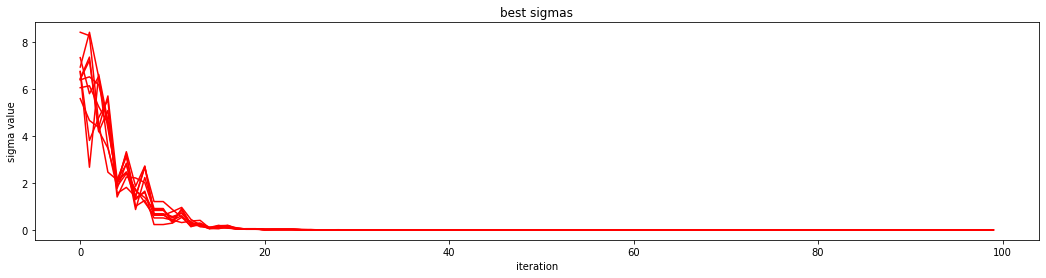

20
Iteration 0000 : best score = -7494.08766270, mean score = -7841.88500363.
Iteration 0080 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0160 : best score = -7106.95836097, mean score = -7106.95836097.


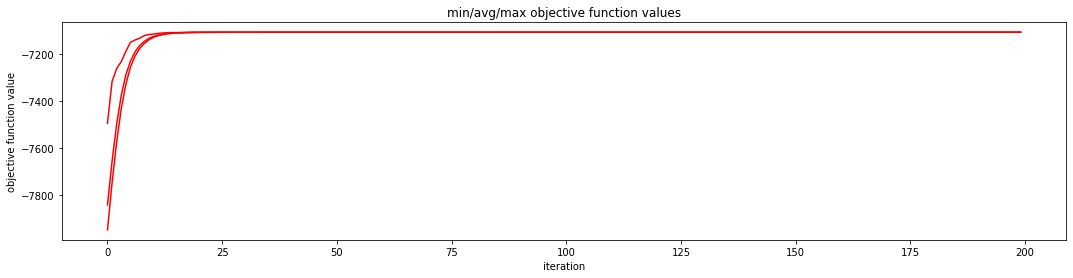

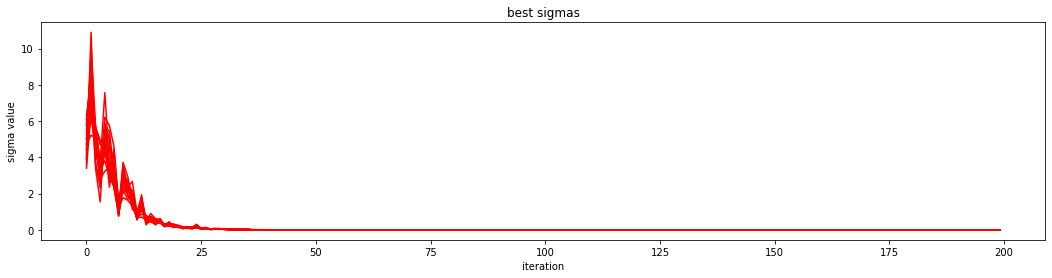

50
Iteration 0000 : best score = -19129.20602256, mean score = -19738.29942992.
Iteration 0200 : best score = -17767.39590242, mean score = -17767.39590242.
Iteration 0400 : best score = -17767.39590242, mean score = -17767.39590242.


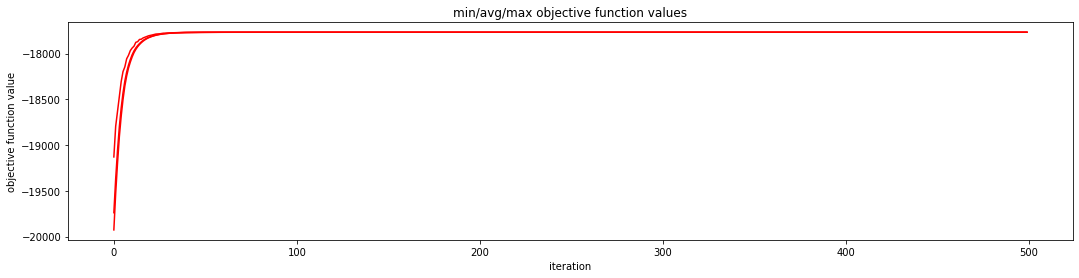

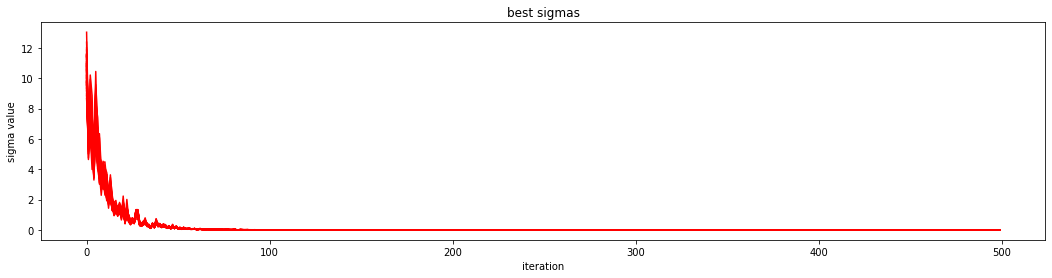

100
Iteration 0000 : best score = -38542.26872416, mean score = -39601.92683133.
Iteration 0400 : best score = -35534.79180485, mean score = -35534.79180485.
Iteration 0800 : best score = -35534.79180484, mean score = -35534.79180484.


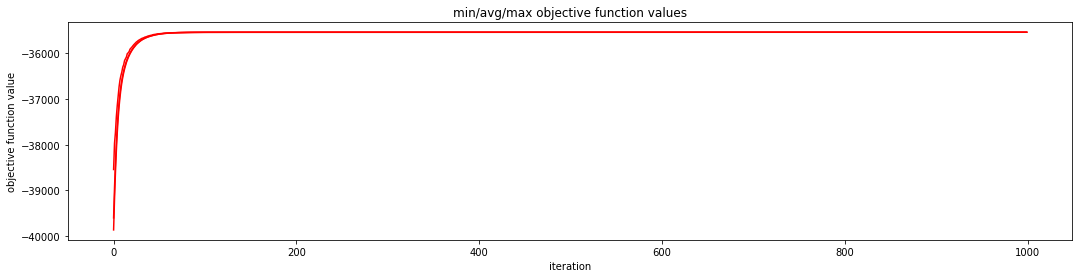

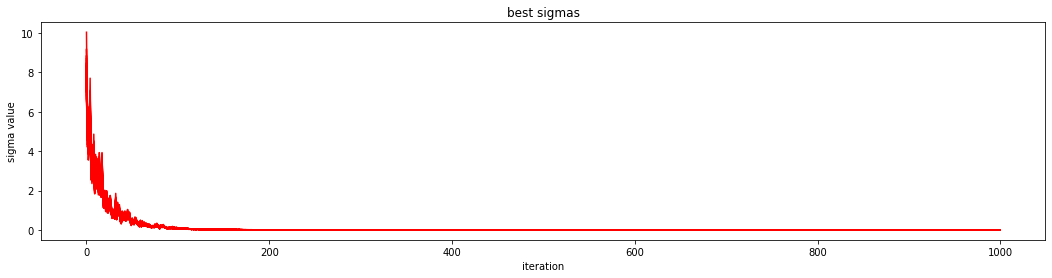

In [40]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F7, d, N, 10*d, 2*N, 2, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d, out_of_range_check=True, bounds=[-500.0, 500.0])

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

10
Iteration 0000 : best score = -2.76485837, mean score = -7.58411473.
Iteration 0040 : best score = -0.00000050, mean score = -0.00000404.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.


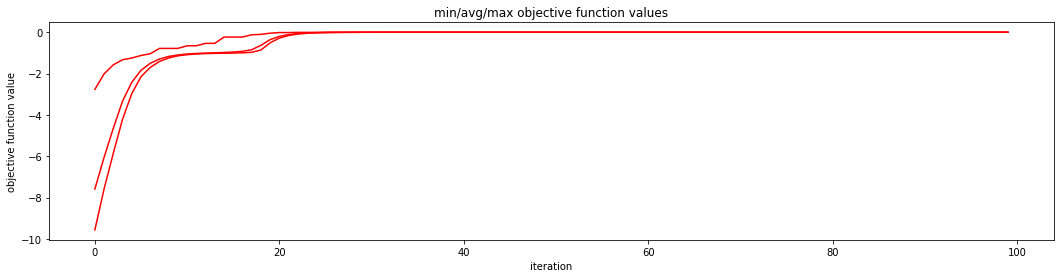

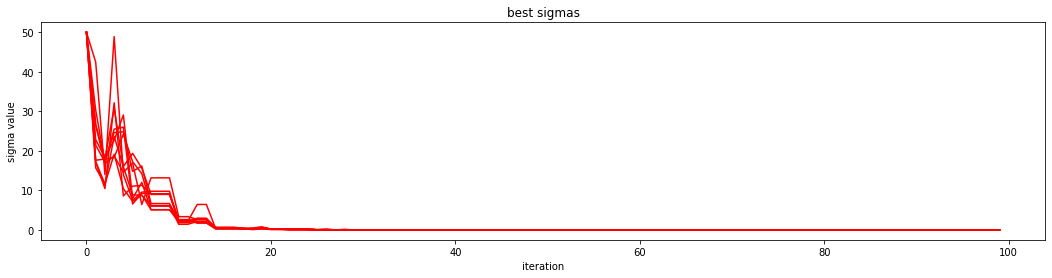

20
Iteration 0000 : best score = -8.59905906, mean score = -15.97403096.
Iteration 0080 : best score = -0.00000018, mean score = -0.00000051.
Iteration 0160 : best score = 0.00000000, mean score = 0.00000000.


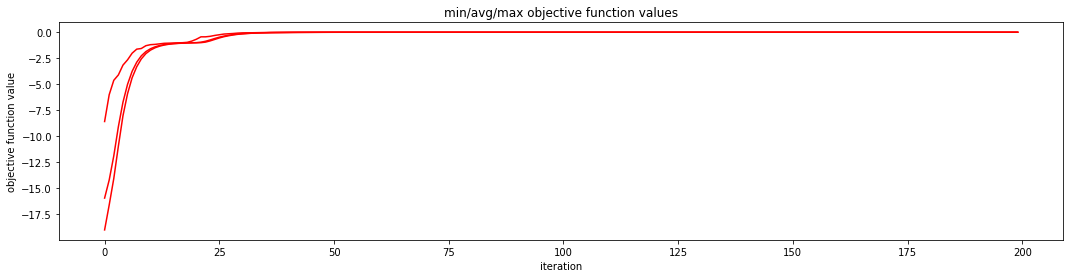

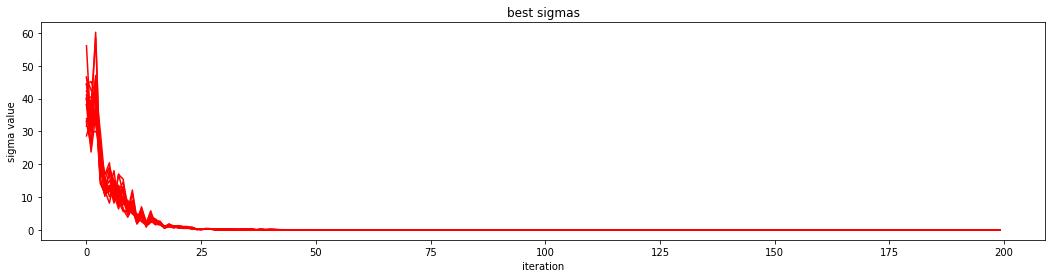

50
Iteration 0000 : best score = -22.24625353, mean score = -41.20863282.
Iteration 0200 : best score = -0.00002116, mean score = -0.00002745.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.


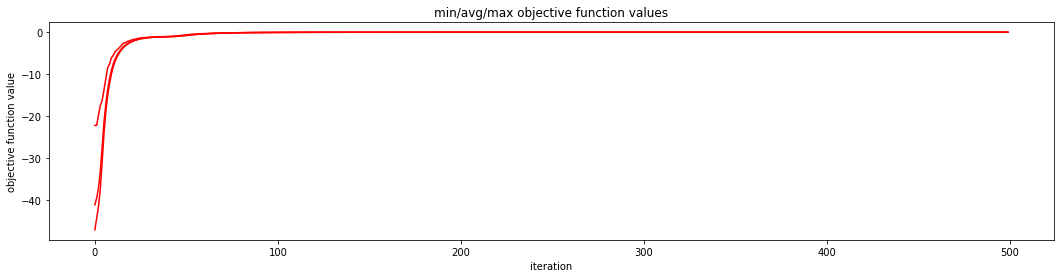

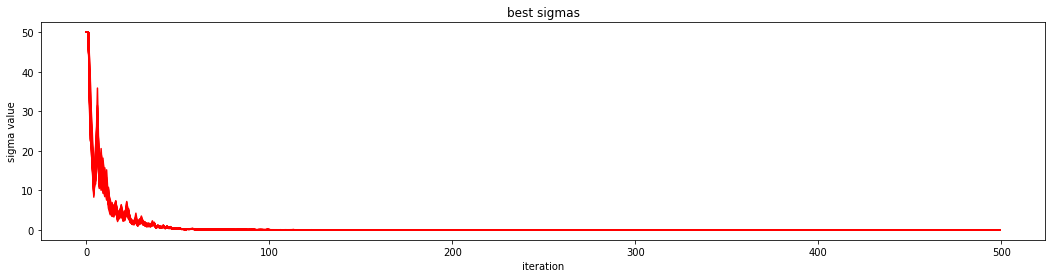

100
Iteration 0000 : best score = -55.73826310, mean score = -83.61442268.
Iteration 0400 : best score = -0.00056270, mean score = -0.00060023.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.


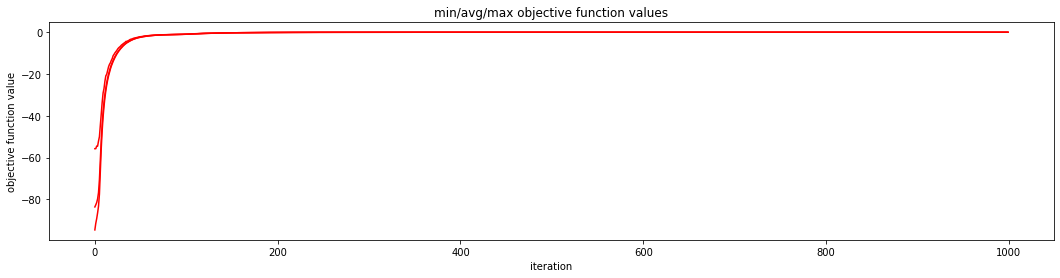

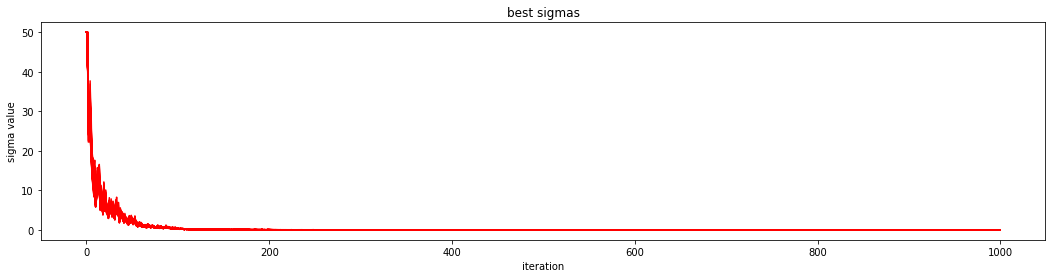

In [41]:
N = 2000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, 10*d, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -1.37386242, mean score = -7.21245157.
Iteration 0040 : best score = -0.00000001, mean score = -0.00000003.
Iteration 0080 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0160 : best score = 0.00000000, mean score = 0.00000000.


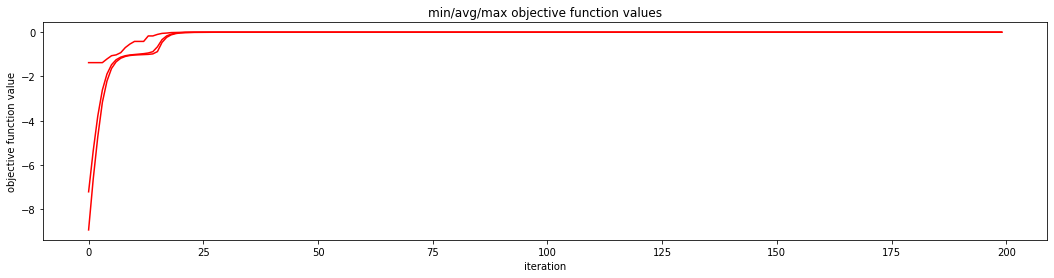

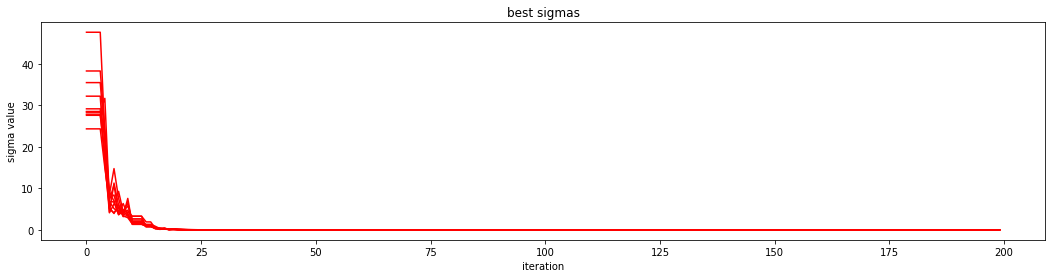

20
Iteration 0000 : best score = -6.54560169, mean score = -15.21091060.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0160 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0240 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0320 : best score = 0.00000000, mean score = 0.00000000.


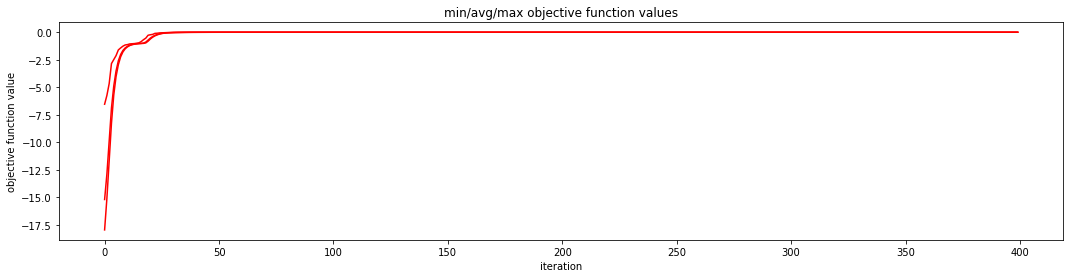

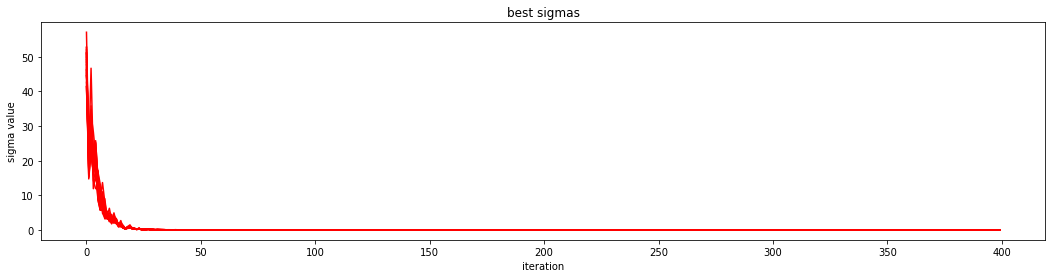

50
Iteration 0000 : best score = -27.35569604, mean score = -40.71294727.
Iteration 0200 : best score = -0.00000391, mean score = -0.00000472.
Iteration 0400 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0600 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0800 : best score = 0.00000000, mean score = 0.00000000.


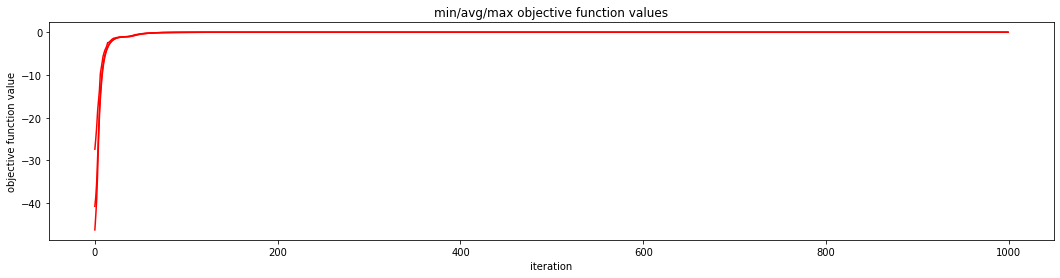

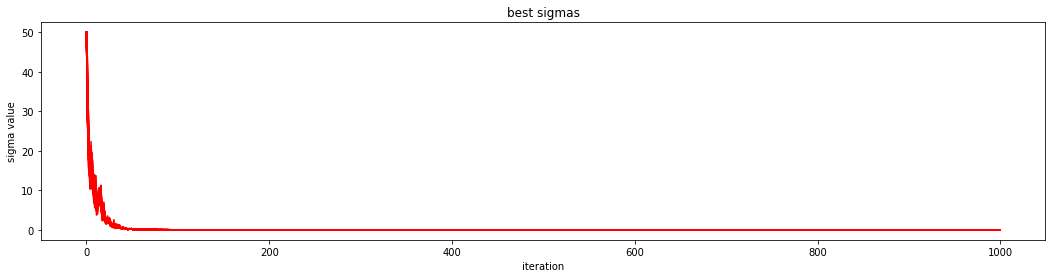

100
Iteration 0000 : best score = -61.40268128, mean score = -83.34750510.
Iteration 0400 : best score = -0.01245833, mean score = -0.01246536.
Iteration 0800 : best score = -0.01232099, mean score = -0.01232099.
Iteration 1200 : best score = -0.01232099, mean score = -0.01232099.
Iteration 1600 : best score = -0.01232099, mean score = -0.01232099.


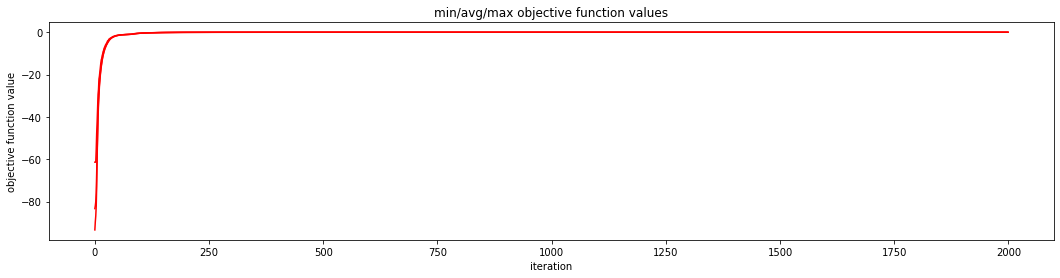

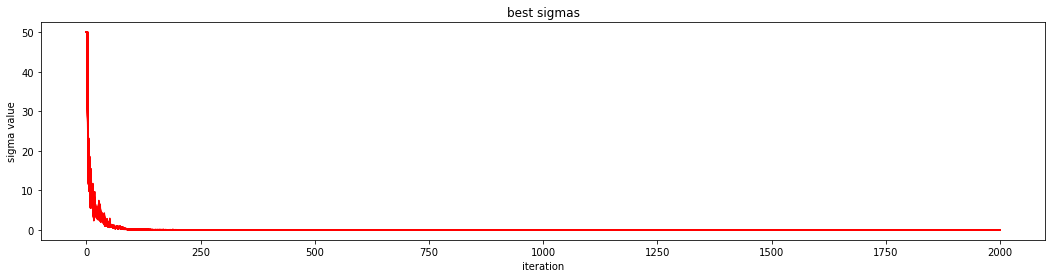

In [42]:
N = 1000

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, 20*d, 3*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -2.37071918, mean score = -8.12910950.
Iteration 0040 : best score = -0.00017905, mean score = -0.00241905.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.


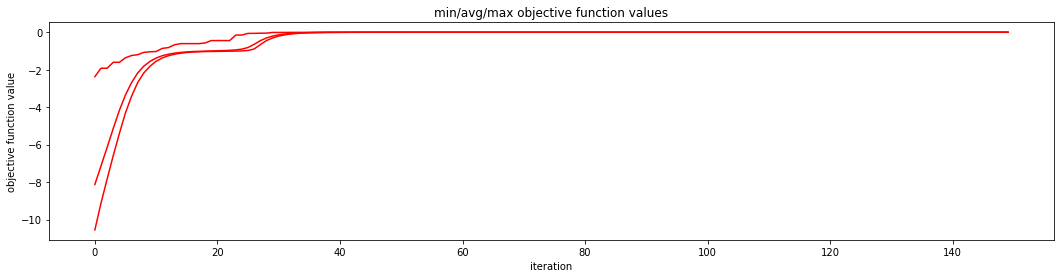

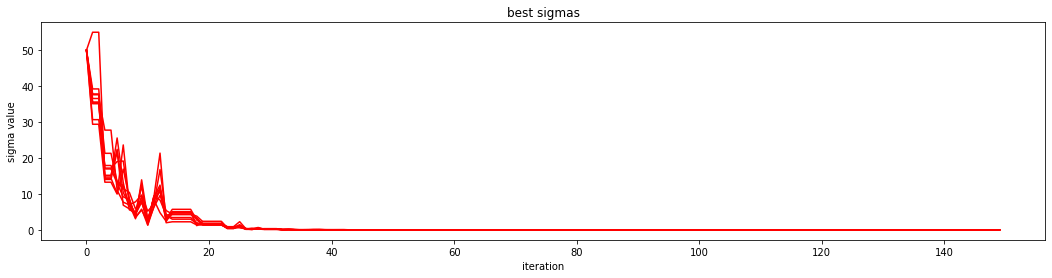

20
Iteration 0000 : best score = -7.41419956, mean score = -16.41375506.
Iteration 0080 : best score = -0.00053106, mean score = -0.00090618.
Iteration 0160 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0240 : best score = 0.00000000, mean score = 0.00000000.


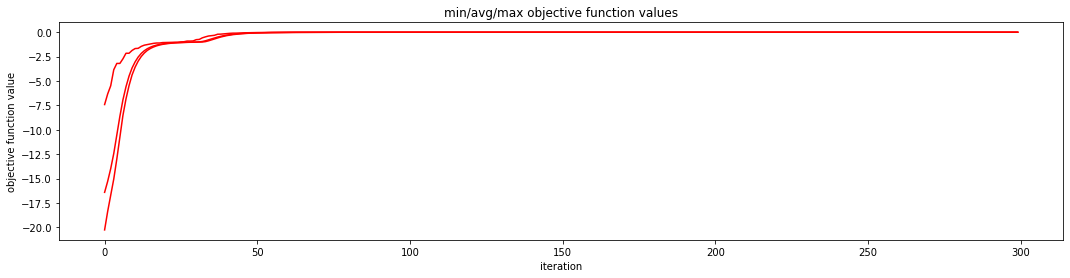

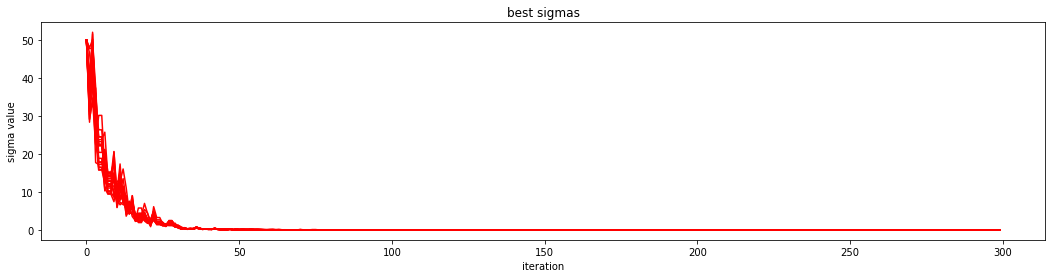

50
Iteration 0000 : best score = -23.15822540, mean score = -41.84993454.
Iteration 0200 : best score = -0.00971874, mean score = -0.01137450.
Iteration 0400 : best score = -0.00000014, mean score = -0.00000018.
Iteration 0600 : best score = -0.00000000, mean score = -0.00000000.


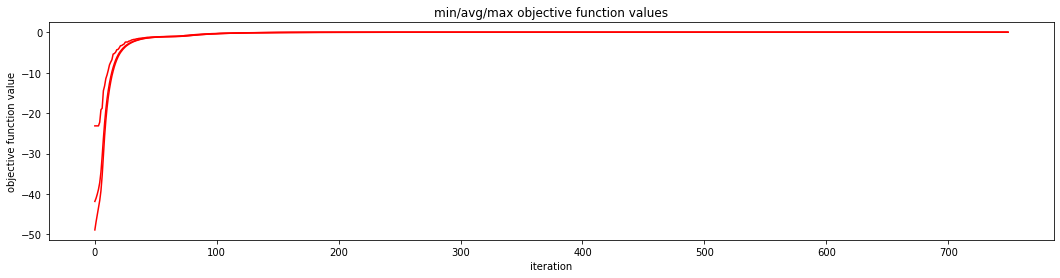

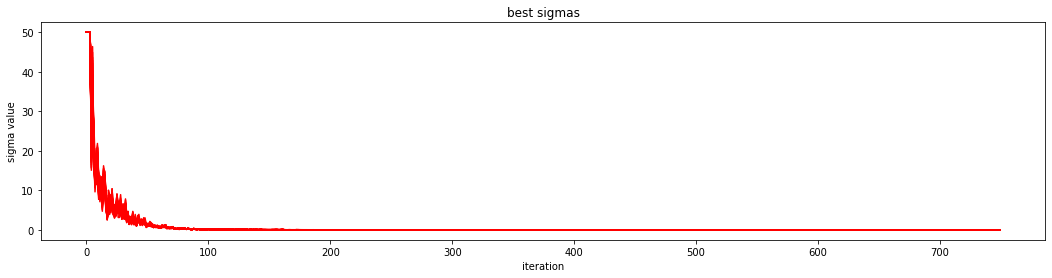

100
Iteration 0000 : best score = -63.71160444, mean score = -83.88572368.
Iteration 0400 : best score = -0.02719952, mean score = -0.02858321.
Iteration 0800 : best score = -0.00740609, mean score = -0.00740740.
Iteration 1200 : best score = -0.00739604, mean score = -0.00739604.


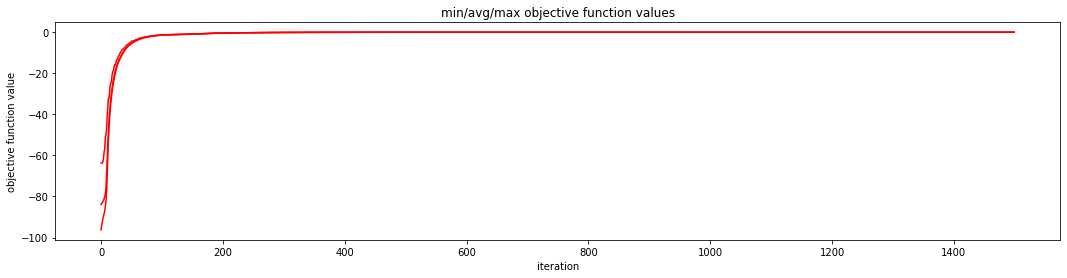

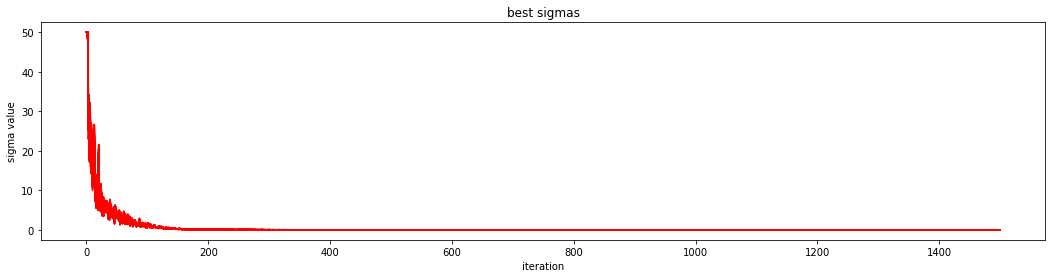

In [43]:
N = 2500

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, 15*d, N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

10
Iteration 0000 : best score = -2.40775740, mean score = -6.17882421.
Iteration 0040 : best score = -0.00000267, mean score = -0.00001394.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.


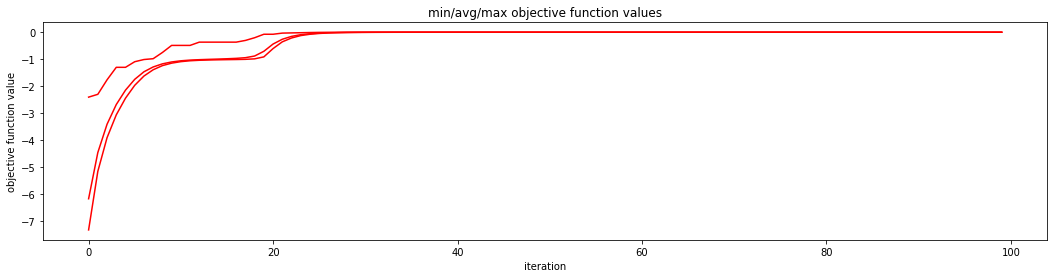

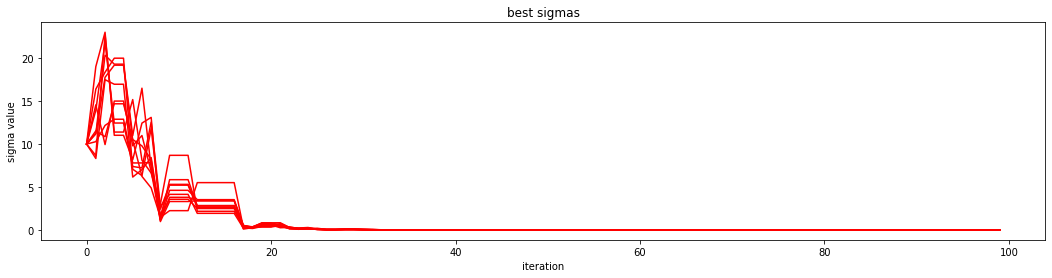

20
Iteration 0000 : best score = -7.04095240, mean score = -12.86854577.
Iteration 0080 : best score = -0.00000265, mean score = -0.00000613.
Iteration 0160 : best score = 0.00000000, mean score = 0.00000000.


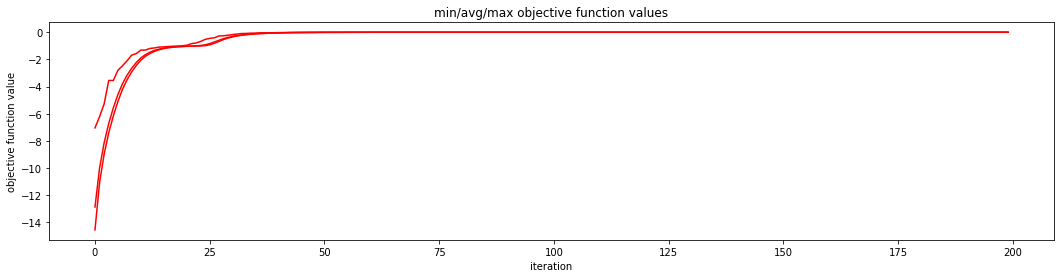

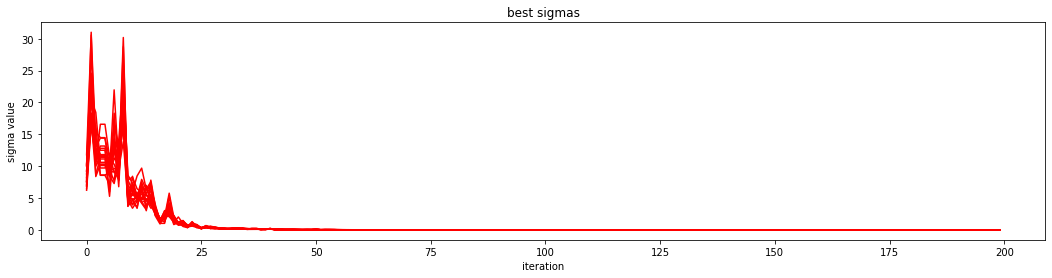

50
Iteration 0000 : best score = -23.45845027, mean score = -33.70584639.
Iteration 0200 : best score = -0.00004104, mean score = -0.00005086.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.


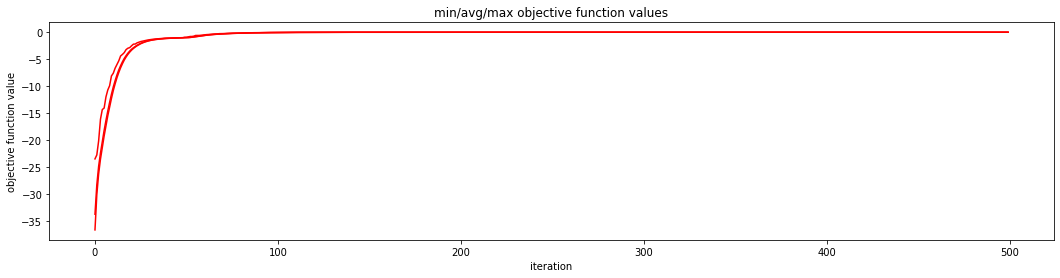

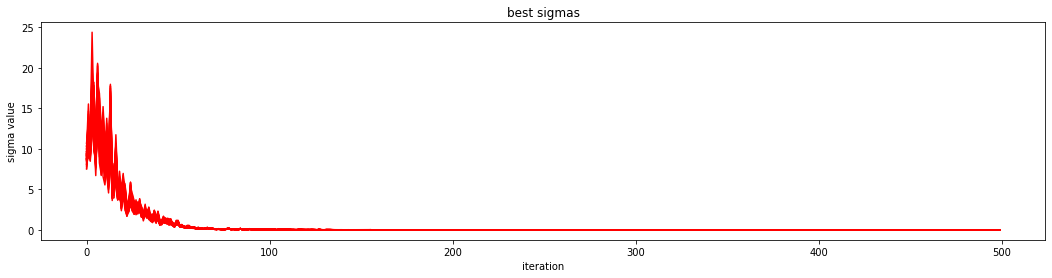

100
Iteration 0000 : best score = -54.49275348, mean score = -69.56381870.
Iteration 0400 : best score = -0.00044800, mean score = -0.00047416.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.


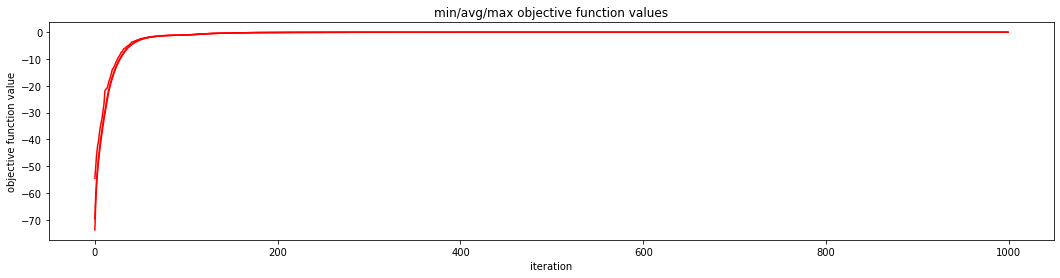

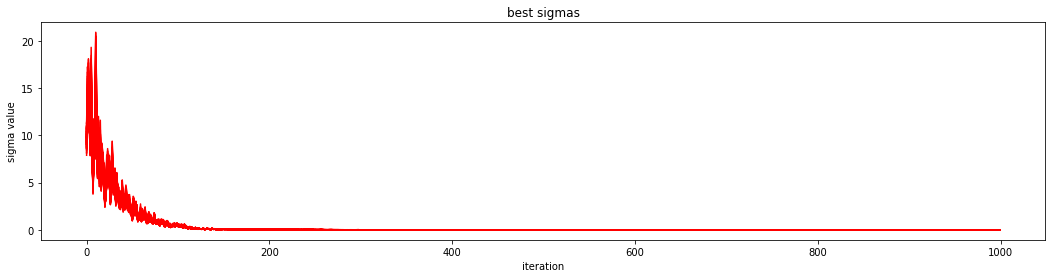

In [50]:
N = 2000
T = 100

for d in [10, 20, 50, 100]:
    print(d)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F8, d, N, 10*d, 2*N, 2, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 4*d)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

## Zad.2

In [12]:
def first_mutation(individual, N, d):
    sigma = 0.25
    return individual + sigma * np.random.randn(N, d)
def second_mutation(individual, N, d):
    sigma = np.array([0.25, 0.5])
    return individual + sigma * np.random.randn(N, d)
def third_mutation(individul, N ,d):
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    return individul + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

In [23]:
def make_mutation(objective_function, mutation_function, individual, N, d):
    values_before_mutation=objective_function(individual)
    mutated_individual=mutation_function(individual, N, d)
    values_after_mutation=objective_function(mutated_individual)
    #print(f"Before: {values_before_mutation.shape}, After: {values_after_mutation.shape}")
    return len([i for i in range(N) if values_before_mutation[0] < values_after_mutation[i]]), np.max(values_after_mutation)

def test_mutations(objective_function, individual=np.array([[1,1]]), N=250, d=2):
    j = 1
    for mut_fun in [first_mutation, second_mutation, third_mutation]:
        print(f"Mutation{j}")
        num_of_better_individuls = 0 
        best_individual_value = objective_function(individual)[0]
        for i in range(1000):
            number_of_better, new_best_individual_value = make_mutation(objective_function, mut_fun, individual, N, d)
            num_of_better_individuls += number_of_better
            if new_best_individual_value > best_individual_value:
                best_individual_value=new_best_individual_value
        print(f"Best individual: {best_individual_value}, number of good mutations: {num_of_better_individuls / (1000 * N)}")
        j += 1

In [24]:
print("Sphere")
test_mutations(objective_function_F1)
test_mutations(objective_function_F1, np.array([[-500, -500]]))
test_mutations(objective_function_F1, np.array([[300, -300]]))
print("Sphere_a")
test_mutations(objective_function_F1a)
test_mutations(objective_function_F1a, np.array([[-500, -500]]))
test_mutations(objective_function_F1a, np.array([[300, -300]]))
print("Sphere_b")
test_mutations(objective_function_F1b)
test_mutations(objective_function_F1b, np.array([[-500, -500]]))
test_mutations(objective_function_F1b, np.array([[300, -300]]))
print("Sphere_c")
test_mutations(objective_function_F1c)
test_mutations(objective_function_F1c, np.array([[-500, -500]]))
test_mutations(objective_function_F1c, np.array([[300, -300]]))
print("Rastrigin")
test_mutations(objective_function_F6)
test_mutations(objective_function_F6, np.array([[-500, -500]]))
test_mutations(objective_function_F6, np.array([[300, -300]]))
print("Schwefel")
test_mutations(objective_function_F7)
test_mutations(objective_function_F7, np.array([[-500, -500]]))
test_mutations(objective_function_F7, np.array([[300, -300]]))
print("Griewank")
test_mutations(objective_function_F8)
test_mutations(objective_function_F8, np.array([[-500, -500]]))
test_mutations(objective_function_F8, np.array([[300, -300]]))

Sphere
Mutation1
Best individual: -0.16825683124500124, number of good mutations: 0.464336
Mutation2
Best individual: -0.026753275443355467, number of good mutations: 0.459744
Mutation3
Best individual: -1.4228671717468748e-05, number of good mutations: 0.480356
Mutation1
Best individual: -498316.5865201745, number of good mutations: 0.501236
Mutation2
Best individual: -497434.8829702898, number of good mutations: 0.499512
Mutation3
Best individual: -495186.3800595162, number of good mutations: 0.500452
Mutation1
Best individual: -179081.8052328194, number of good mutations: 0.497868
Mutation2
Best individual: -178356.69153861934, number of good mutations: 0.500532
Mutation3
Best individual: -178505.54736884555, number of good mutations: 0.49876
Sphere_a
Mutation1
Best individual: -0.31431383121975365, number of good mutations: 0.493668
Mutation2
Best individual: -0.023851756323624695, number of good mutations: 0.495604
Mutation3
Best individual: -7.06901264091376e-05, number of good m

Rozkład Cholesky'ego macierzy kowariancji jest używany w trzeciej mutacji w celu wyznaczenia wartości z rozkładu normalnego  $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$. Ogólnie jeśli $\boldsymbol{\Sigma} = \mathcal{U^T} * \mathcal{U}$ i $\mathcal{X} \sim \mathcal{N}(\mathbf{0}, \boldsymbol{1})$, to $\mathcal{X} * \mathcal{U} \sim \mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$ 

In [37]:
#Confidence ellipse. Source: https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    print(f"Horizontal axis: {ell_radius_x}, vertical axis: {ell_radius_y}")

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Horizontal axis: 0.984810608191707, vertical axis: 1.0149621007668614
Horizontal axis: 1.011361798932686, vertical axis: 0.9885076184125449
Horizontal axis: 1.3085107705349517, vertical axis: 0.536469536314996


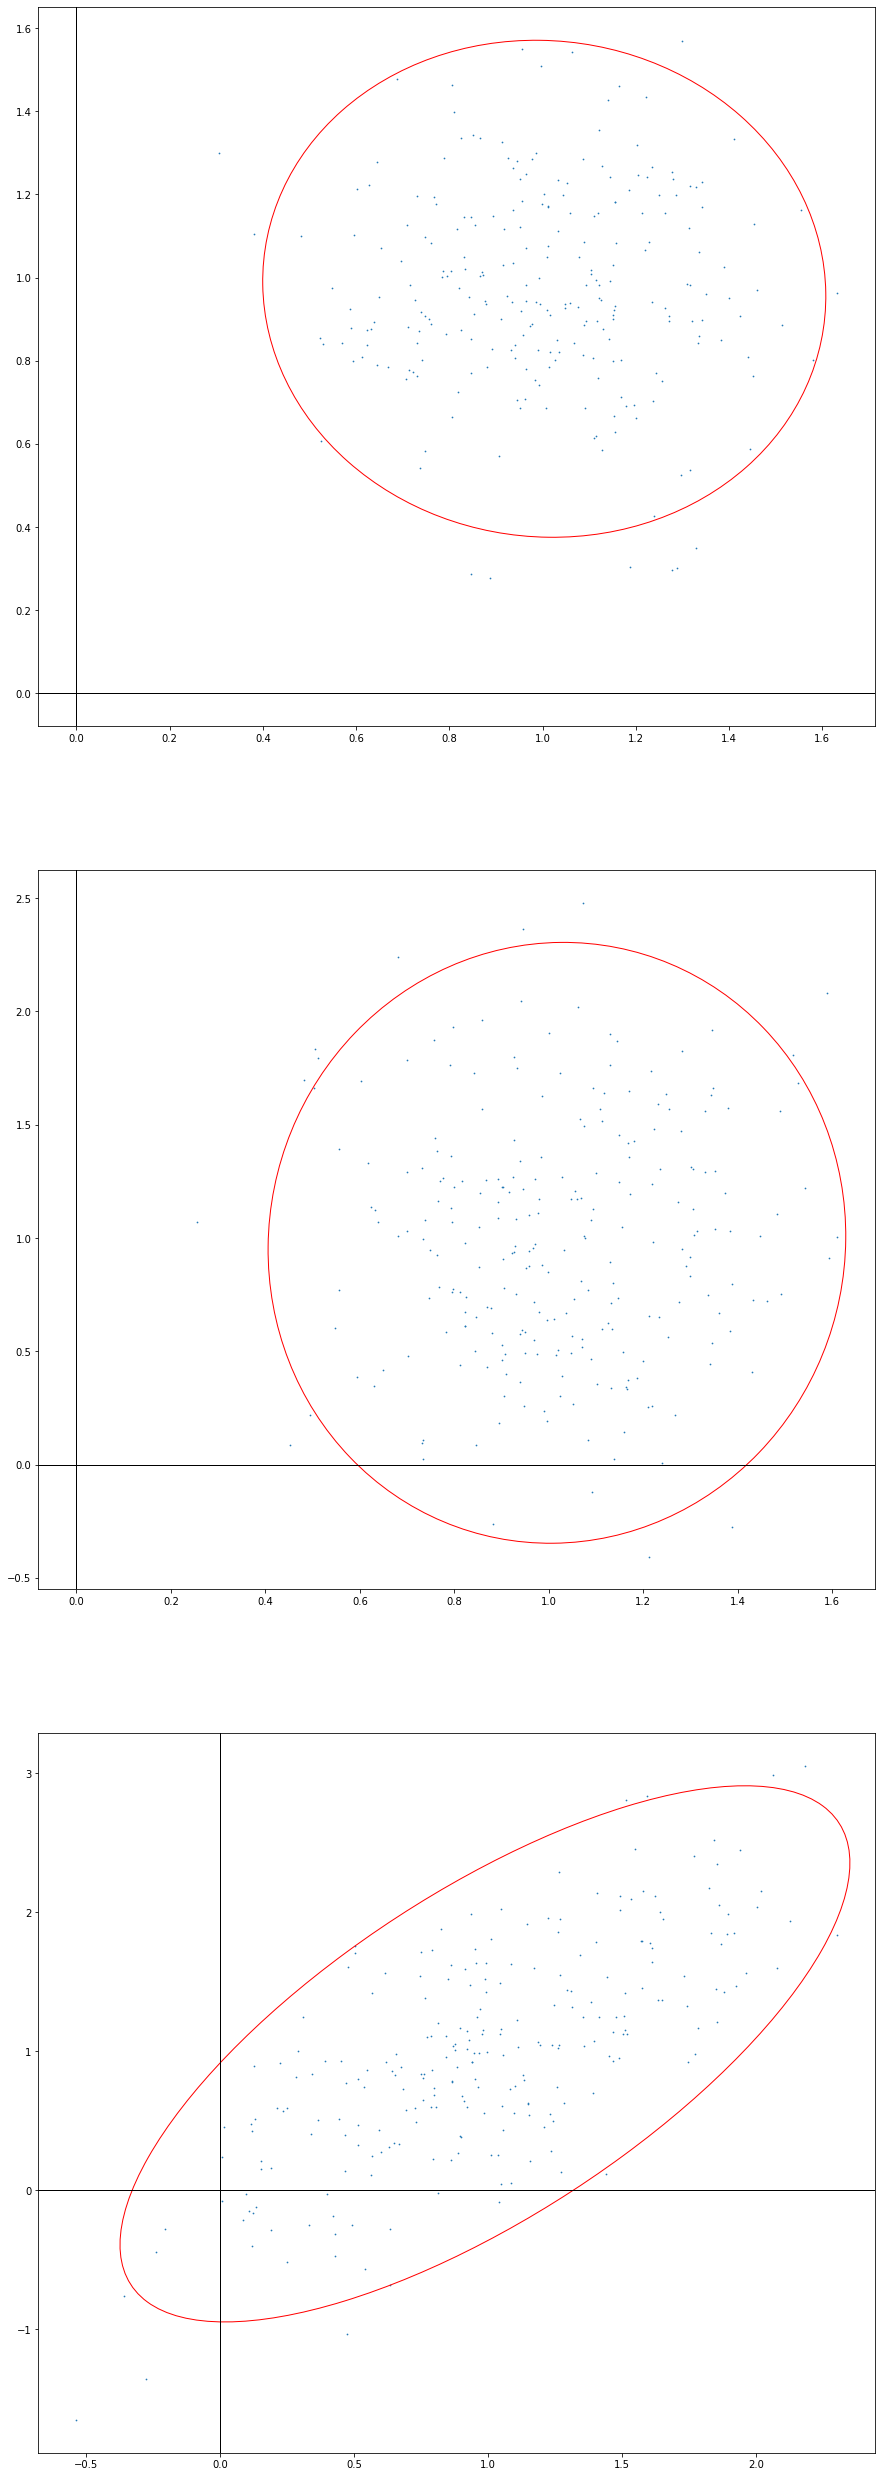

In [39]:
original_individual = np.array([[1, 1]])
fig, axs = plt.subplots(3, 1, figsize=(15, 45))
for ax, mut_fun in zip(axs, [first_mutation, second_mutation, third_mutation]):
    mutated_individuls = mut_fun(original_individual, 250, 2)
    x, y = mutated_individuls[:, 0], mutated_individuls[:, 1]
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='black', lw=1)
    ax.axhline(c='black', lw=1)

    confidence_ellipse(x, y, ax, n_std=2.5, edgecolor='red')

plt.show()

## Zad.3

In [28]:
def first_mutation(children_population_solutions, children_population_sigmas, number_of_offspring, chromosome_length):
    for i in range(number_of_offspring):
        children_population_solutions[i, :] += children_population_sigmas[i, 0] * np.random.randn(chromosome_length)
    return children_population_solutions 
def second_mutation(children_population_solutions, children_population_sigmas, number_of_offspring, chromosome_length):
    for i in range(number_of_offspring):
        children_population_solutions[i, :] += children_population_sigmas[i, :] * np.random.randn(chromosome_length)
    return children_population_solutions
def third_mutation(children_population_solutions, children_population_sigmas, number_of_offspring, chromosome_length):
    return children_population_solutions + np.dot(np.random.randn(number_of_offspring, chromosome_length), np.linalg.cholesky(np.cov(children_population_sigmas.T)).T)

Iteration 0000 : best score = -228313.73898471, mean score = -329717.77740033.
Iteration 0100 : best score = -102.67588284, mean score = -120.73762016.
Iteration 0200 : best score = -0.15701606, mean score = -0.17623486.
Iteration 0300 : best score = -0.00029935, mean score = -0.00034808.
Iteration 0400 : best score = -0.00000041, mean score = -0.00000047.


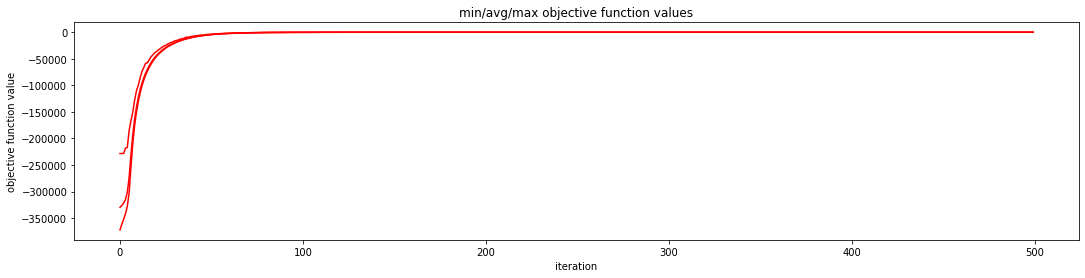

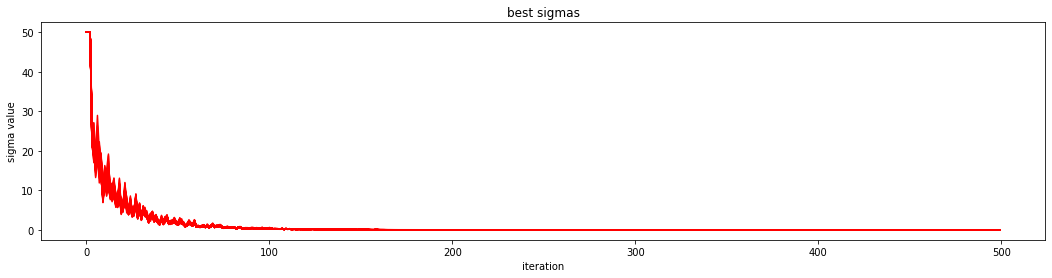

<function first_mutation at 0x00000198FCFE2D08>
Iteration 0000 : best score = -237024.79954994, mean score = -330516.91569009.
Iteration 0100 : best score = -141.08698234, mean score = -162.39827333.
Iteration 0200 : best score = -0.10864026, mean score = -0.12728181.
Iteration 0300 : best score = -0.00009646, mean score = -0.00011332.
Iteration 0400 : best score = -0.00000008, mean score = -0.00000009.


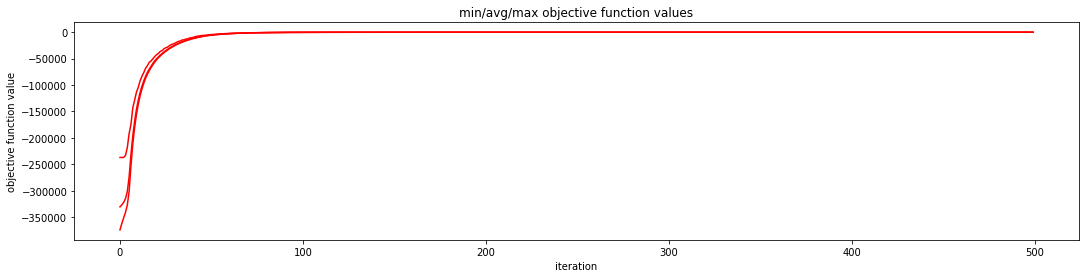

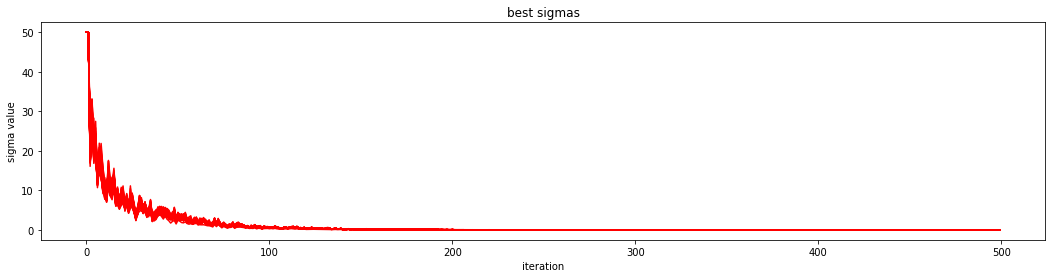

<function second_mutation at 0x00000198FD005510>
Iteration 0000 : best score = -227851.49246481, mean score = -330088.29595168.
Iteration 0100 : best score = -118.55304789, mean score = -141.08529164.
Iteration 0200 : best score = -0.11425054, mean score = -0.12996631.
Iteration 0300 : best score = -0.00022420, mean score = -0.00025450.
Iteration 0400 : best score = -0.00000045, mean score = -0.00000052.


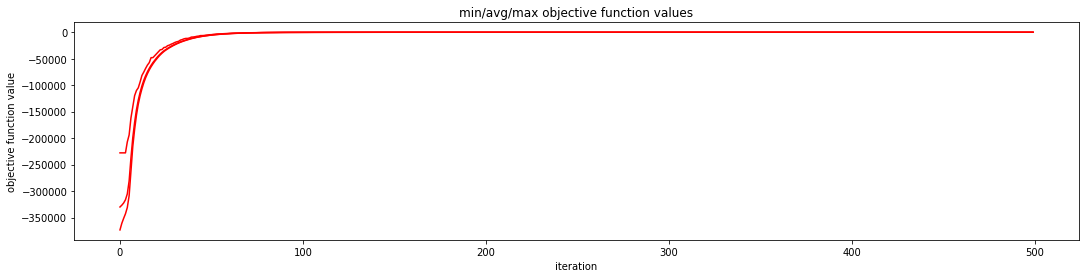

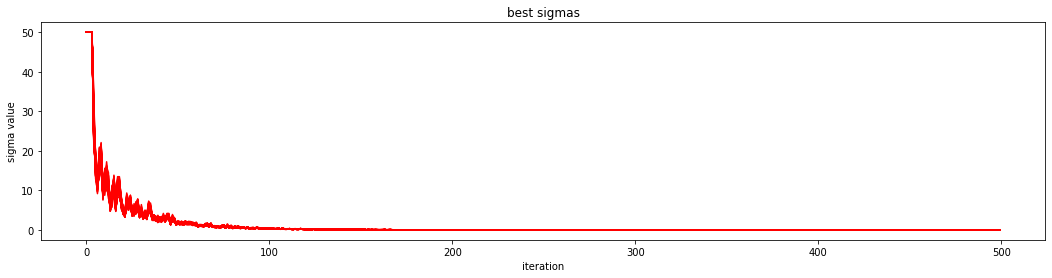

<function third_mutation at 0x00000198FCF4E400>
Iteration 0000 : best score = -33145.47559029, mean score = -205302.40099822.
Iteration 0100 : best score = -4489.17826077, mean score = -5924.84325951.
Iteration 0200 : best score = -4489.17826077, mean score = -5716.70669325.
Iteration 0300 : best score = -4489.17826077, mean score = -5614.06651386.
Iteration 0400 : best score = -4489.17826077, mean score = -5543.50592450.


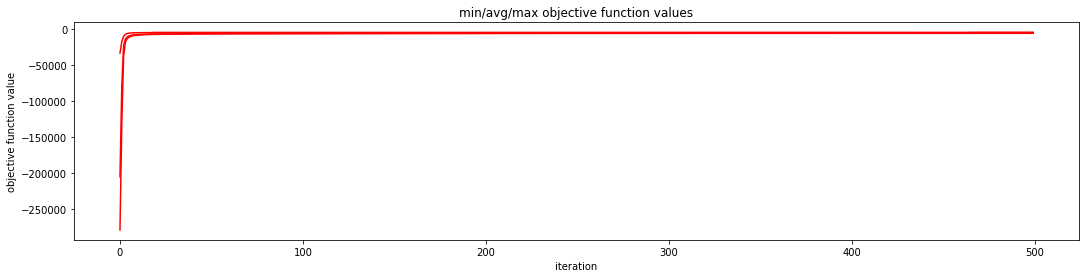

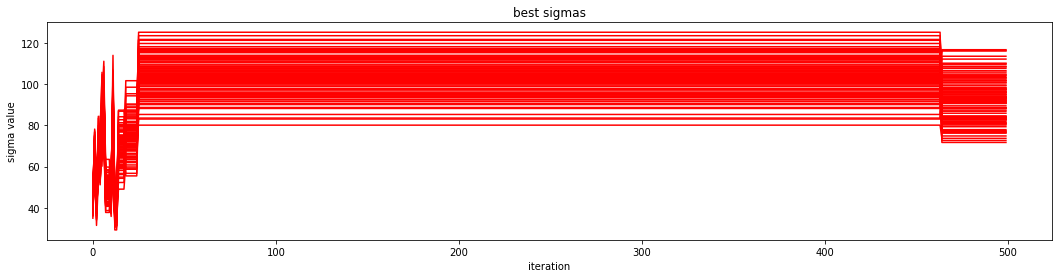

In [18]:
d = 100
T=500
N = 2000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5)
plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

for mutation in [first_mutation, second_mutation, third_mutation]:
    print(mutation)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T/5, mutation_function=mutation)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

Iteration 0000 : best score = -8.71465730, mean score = -6212.13262997.
Iteration 0100 : best score = -0.00003046, mean score = -5.10763316.
Iteration 0200 : best score = -0.00003046, mean score = -1.33143338.
Iteration 0300 : best score = -0.00003046, mean score = -0.57801877.
Iteration 0400 : best score = -0.00003046, mean score = -0.32883735.


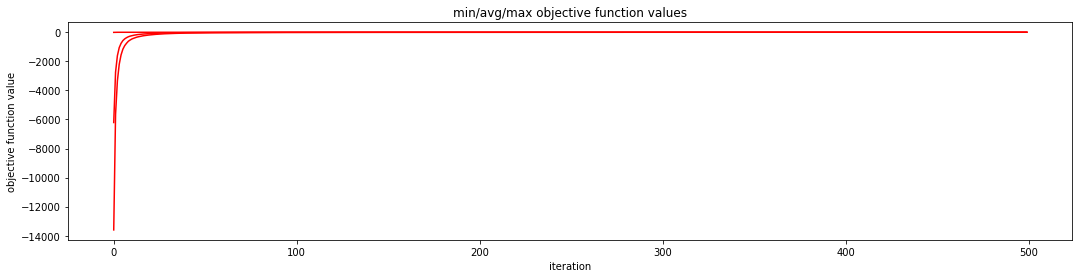

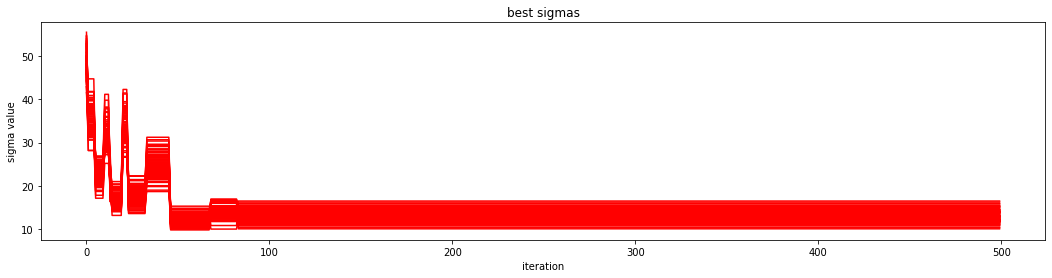

<function first_mutation at 0x00000198FD66F378>
Iteration 0000 : best score = -15.11450506, mean score = -6424.60875618.
Iteration 0100 : best score = -0.00261042, mean score = -4.63527221.
Iteration 0200 : best score = -0.00042936, mean score = -1.11313611.
Iteration 0300 : best score = -0.00042936, mean score = -0.46303211.
Iteration 0400 : best score = -0.00042936, mean score = -0.24859860.


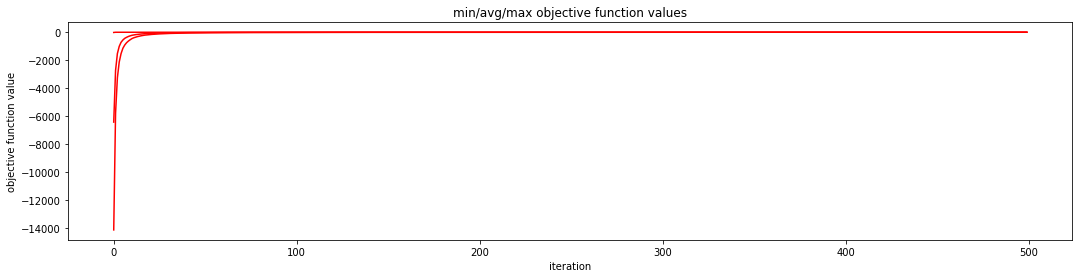

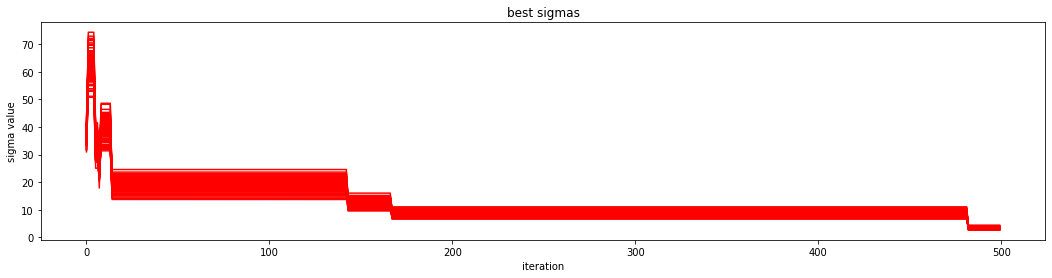

<function second_mutation at 0x0000019880086950>
Iteration 0000 : best score = -3.66473584, mean score = -6354.94669775.
Iteration 0100 : best score = -0.00911069, mean score = -6.45664761.
Iteration 0200 : best score = -0.00540654, mean score = -1.88470586.
Iteration 0300 : best score = -0.00132847, mean score = -0.84810846.
Iteration 0400 : best score = -0.00132847, mean score = -0.46933673.


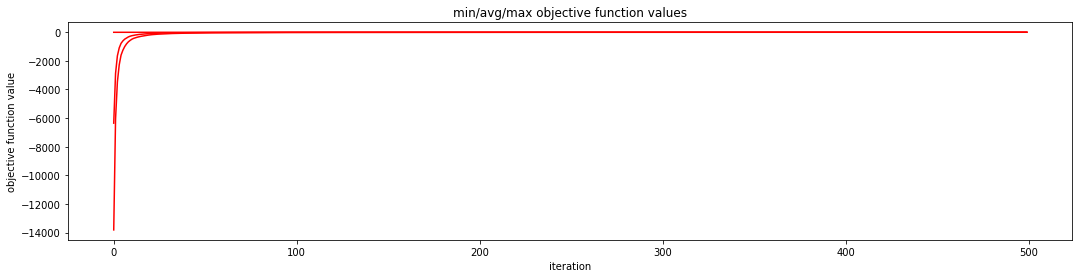

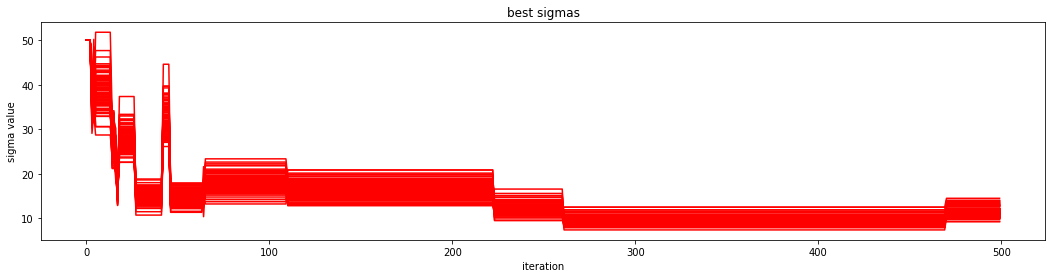

<function third_mutation at 0x00000198FCFE2D08>
Iteration 0000 : best score = -8.88036128, mean score = -5501.14455789.
Iteration 0100 : best score = -0.00017202, mean score = -2.64172099.
Iteration 0200 : best score = -0.00017202, mean score = -1.34023470.
Iteration 0300 : best score = -0.00017202, mean score = -0.89664391.
Iteration 0400 : best score = -0.00017202, mean score = -0.67987358.


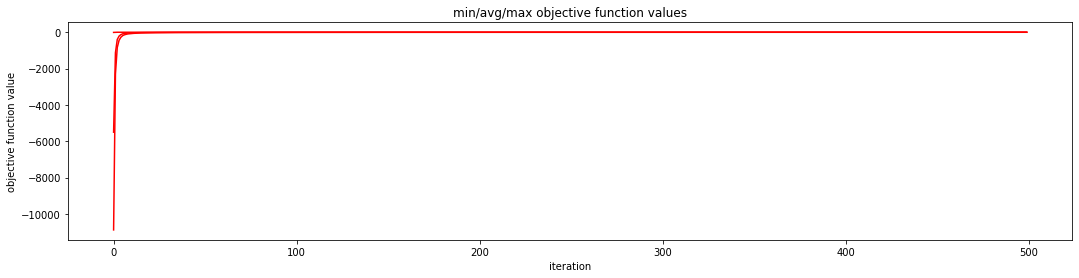

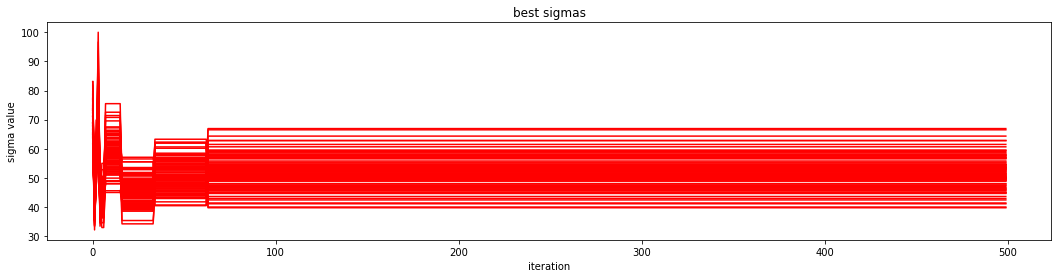

In [29]:
d = 100
T=500
N = 2000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()
for mutation in [first_mutation, second_mutation, third_mutation]:
    print(mutation)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5, mutation_function=mutation)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

Iteration 0000 : best score = -3.53130759, mean score = -205362.67237959.
Iteration 0100 : best score = -0.02898425, mean score = -91.41497928.
Iteration 0200 : best score = -0.02898425, mean score = -27.87625162.
Iteration 0300 : best score = -0.02454229, mean score = -13.06721187.
Iteration 0400 : best score = -0.00065291, mean score = -7.22426190.


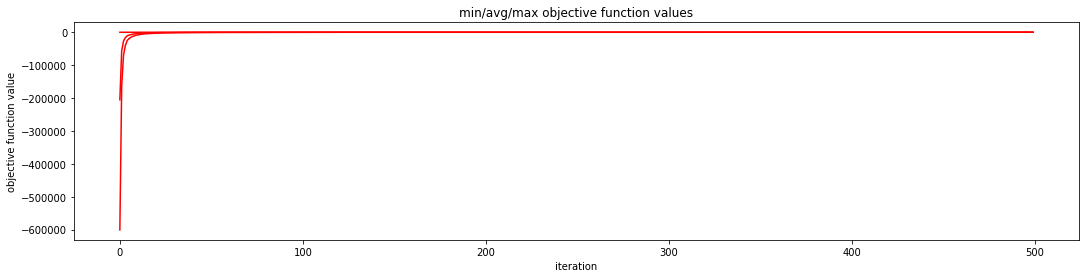

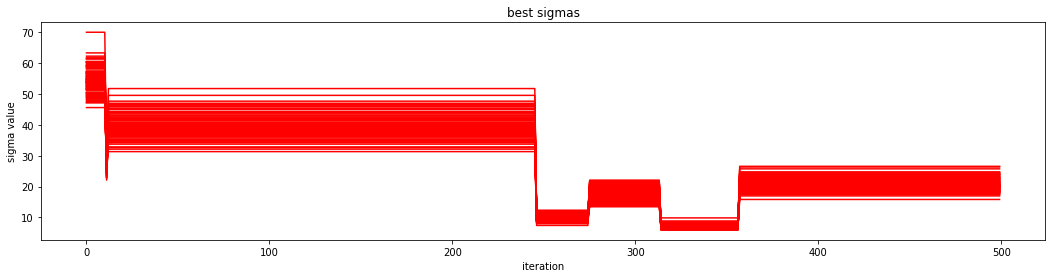

<function first_mutation at 0x00000198FD66F378>
Iteration 0000 : best score = -60.97421558, mean score = -208970.55053456.
Iteration 0100 : best score = -0.33617120, mean score = -82.95940553.
Iteration 0200 : best score = -0.00021525, mean score = -21.32564777.
Iteration 0300 : best score = -0.00021525, mean score = -9.68468400.
Iteration 0400 : best score = -0.00021525, mean score = -5.25034181.


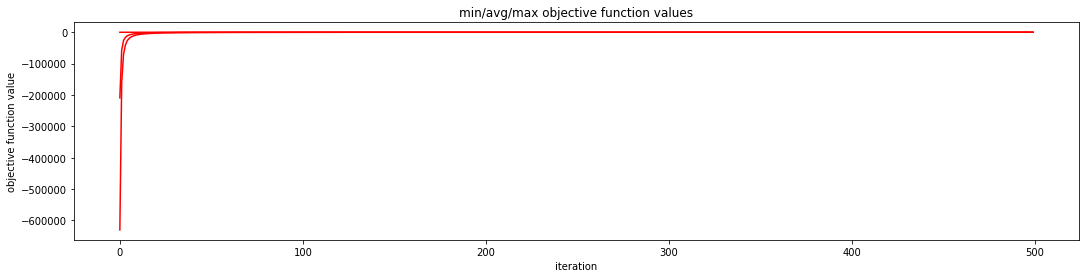

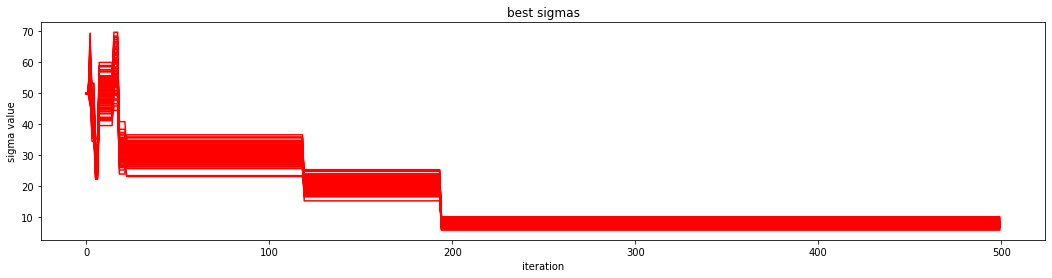

<function second_mutation at 0x0000019880086950>
Iteration 0000 : best score = -77.59490408, mean score = -203258.49004683.
Iteration 0100 : best score = -0.23514923, mean score = -99.16533116.
Iteration 0200 : best score = -0.10938273, mean score = -30.56942540.
Iteration 0300 : best score = -0.05053862, mean score = -15.27860356.
Iteration 0400 : best score = -0.03152825, mean score = -8.74708768.


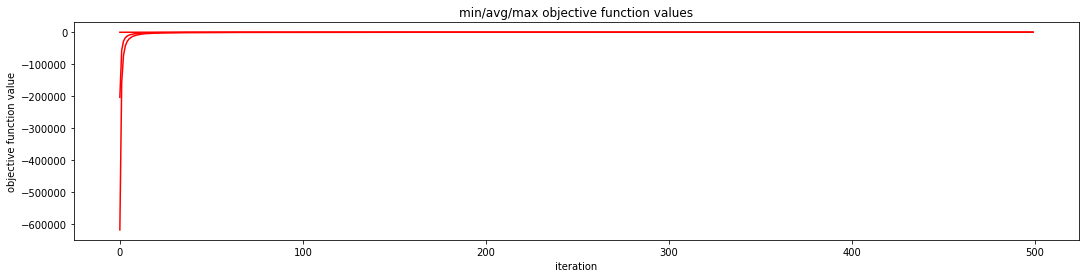

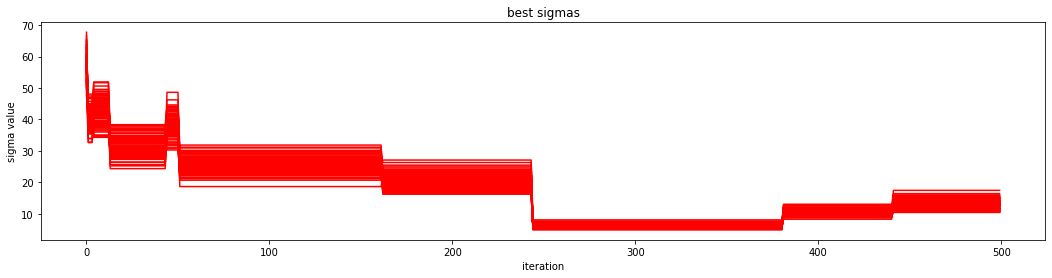

<function third_mutation at 0x00000198FCFE2D08>
Iteration 0000 : best score = -118.50152676, mean score = -189111.16916310.
Iteration 0100 : best score = -0.03623164, mean score = -33.20939064.
Iteration 0200 : best score = -0.00953124, mean score = -14.57424176.
Iteration 0300 : best score = -0.00953124, mean score = -9.74389074.
Iteration 0400 : best score = -0.00183293, mean score = -7.12843401.


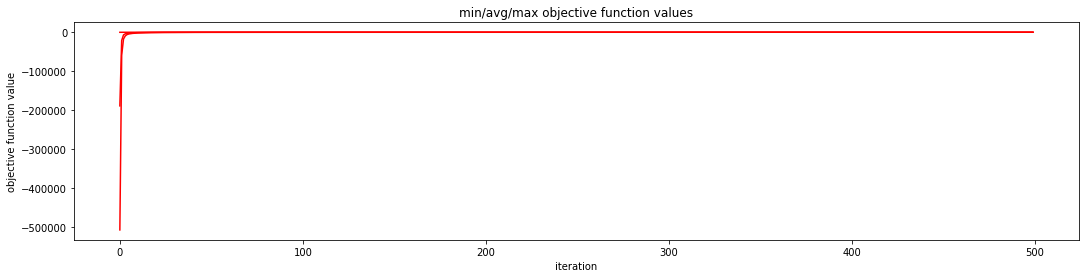

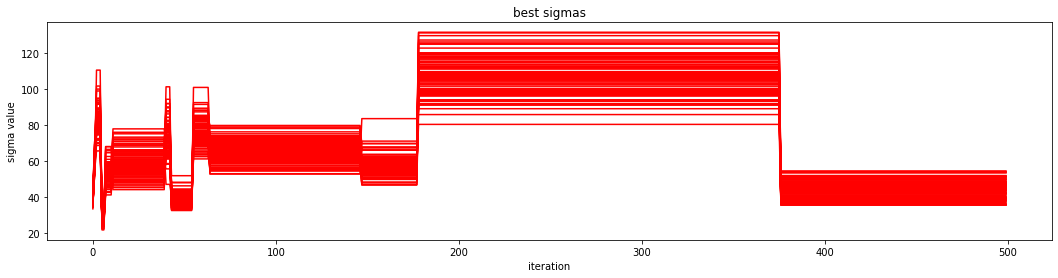

In [30]:
d = 100
T=500
N = 2000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1b, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5)
plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

for mutation in [first_mutation, second_mutation, third_mutation]:
    print(mutation)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1b, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5, mutation_function=mutation)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

Iteration 0000 : best score = -2.00734675, mean score = -1813.45944526.
Iteration 0100 : best score = -0.00135104, mean score = -1.96063542.
Iteration 0200 : best score = -0.00135104, mean score = -0.51313329.
Iteration 0300 : best score = -0.00015719, mean score = -0.22735212.
Iteration 0400 : best score = -0.00015719, mean score = -0.13007059.


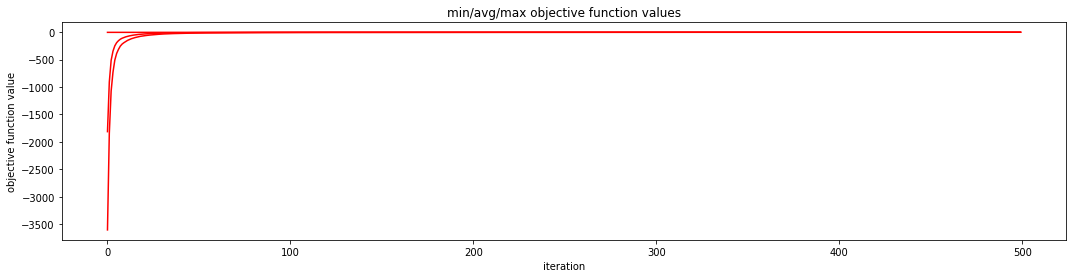

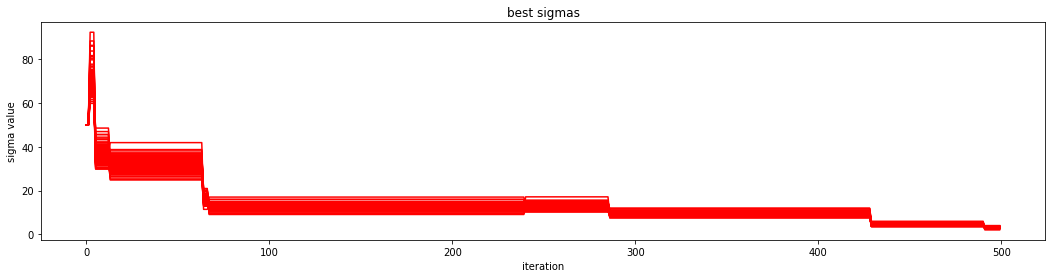

<function first_mutation at 0x00000198FD66F378>
Iteration 0000 : best score = -2.09510506, mean score = -1737.87195040.
Iteration 0100 : best score = -0.00072513, mean score = -1.37991048.
Iteration 0200 : best score = -0.00003354, mean score = -0.30718282.
Iteration 0300 : best score = -0.00003354, mean score = -0.12595145.
Iteration 0400 : best score = -0.00003354, mean score = -0.06617989.


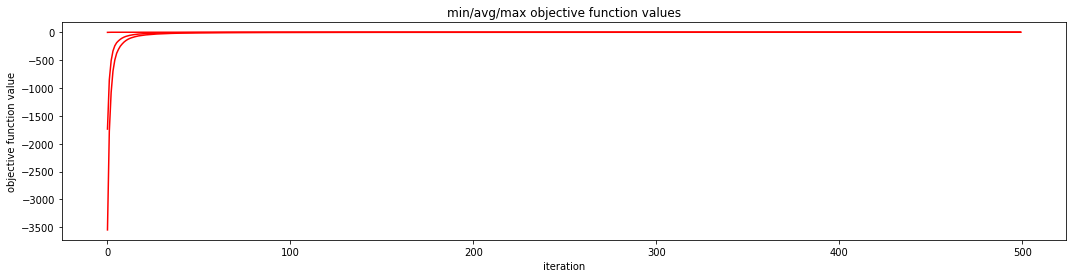

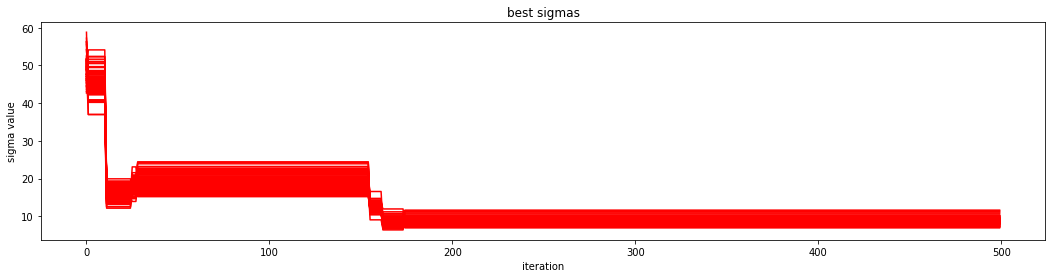

<function second_mutation at 0x0000019880086950>
Iteration 0000 : best score = -4.89426084, mean score = -1727.91264754.
Iteration 0100 : best score = -0.00257732, mean score = -1.92244913.
Iteration 0200 : best score = -0.00089447, mean score = -0.50291057.
Iteration 0300 : best score = -0.00007431, mean score = -0.20829152.
Iteration 0400 : best score = -0.00007431, mean score = -0.10628800.


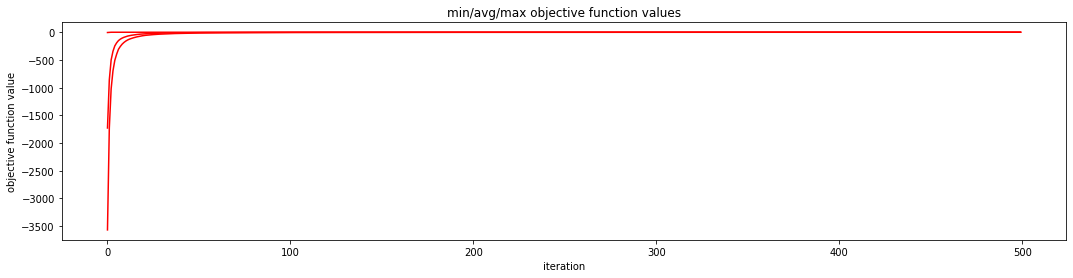

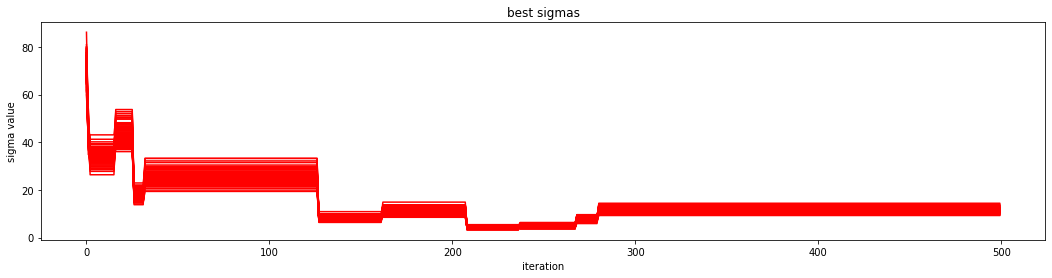

<function third_mutation at 0x00000198FCFE2D08>
Iteration 0000 : best score = -0.49991431, mean score = -1161.52941447.
Iteration 0100 : best score = -0.00044798, mean score = -0.91949140.
Iteration 0200 : best score = -0.00044798, mean score = -0.48768985.
Iteration 0300 : best score = -0.00044798, mean score = -0.34002705.
Iteration 0400 : best score = -0.00044798, mean score = -0.25858156.


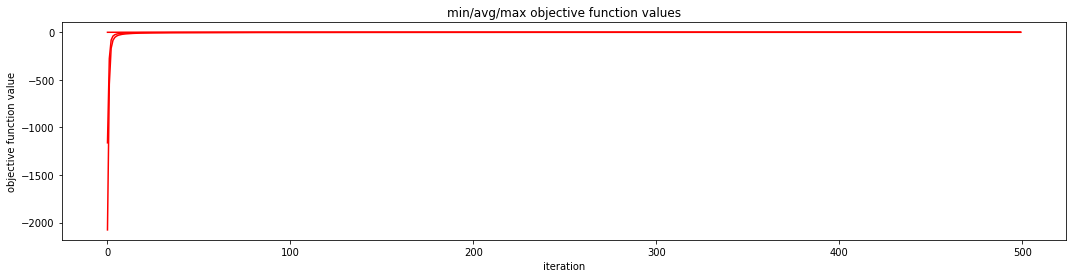

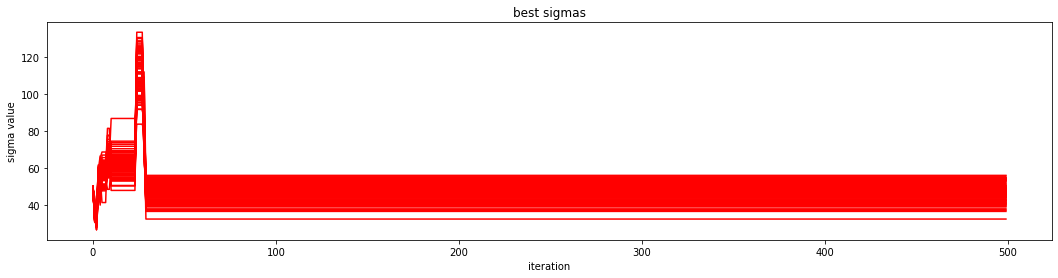

In [31]:
d = 100
T=500
N = 2000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1c, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5)
plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

for mutation in [first_mutation, second_mutation, third_mutation]:
    print(mutation)
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F1c, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), T / 5, mutation_function=mutation)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')

    plt.show()

## Zad.4

In [10]:
def distance_from_target(individual, target, arms_lens, lower_bounds, upper_bounds):
    worst_res = (target[0]**2 + target[1]**2) * 1000
    angle, x, y = 0, 0, 0
    for i in range(len(individual)):
        if lower_bounds[i] > individual[i] or individual[i] > upper_bounds[i]:
            return worst_res
        angle += individual[i]
        x += arms_lens[i] * np.sin(angle * np.pi / 180)
        y += arms_lens[i] * np.cos(angle * np.pi / 180)
    return (((x - target[0]) ** 2) + ((y - target[1]) ** 2)) ** 0.5

def inverse_kinematics_objective_function(X, target, arms_lens, lower_bounds, upper_bounds):
    res=np.zeros(len(X))
    for i in range(len(X)):
        res[i] = - distance_from_target(X[i], target, arms_lens, lower_bounds, upper_bounds)
    return res

In [16]:
def plot_arm(chromosome, target, arms_lens):
    plt.scatter(target[0], target[1], color = 'grey', s = 10)
    plt.scatter(0, 0, s = 10)
    angle, x, y = 0, 0, 0
    for i in range(len(chromosome)):
        #print(arms_lens[i])
        previous_x, previous_y = x, y
        angle += chromosome[i]
        x += arms_lens[i] * np.sin(angle * np.pi / 180)
        y += arms_lens[i] * np.cos(angle * np.pi / 180)
        plt.plot([previous_x, x], 
                 [previous_y, y])
        plt.scatter(x, y)

Iteration 0000 : best score = -10.02265563, mean score = -17.14326664.
Iteration 0100 : best score = -0.04614698, mean score = -0.05409622.
Iteration 0200 : best score = -0.02910626, mean score = -0.03126636.
Iteration 0300 : best score = -0.02182167, mean score = -0.02271677.
Iteration 0400 : best score = -0.01816581, mean score = -0.01891643.
Iteration 0500 : best score = -0.01545081, mean score = -0.01602628.
Iteration 0600 : best score = -0.01318519, mean score = -0.01362104.
Iteration 0700 : best score = -0.01200473, mean score = -0.01221147.
Iteration 0800 : best score = -0.01099384, mean score = -0.01117657.
Iteration 0900 : best score = -0.01010184, mean score = -0.01034011.


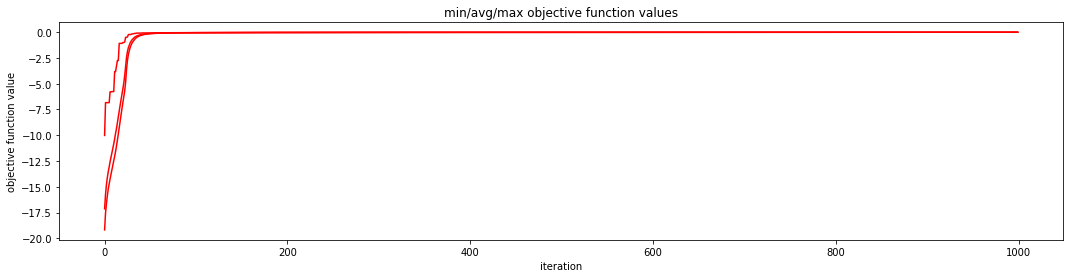

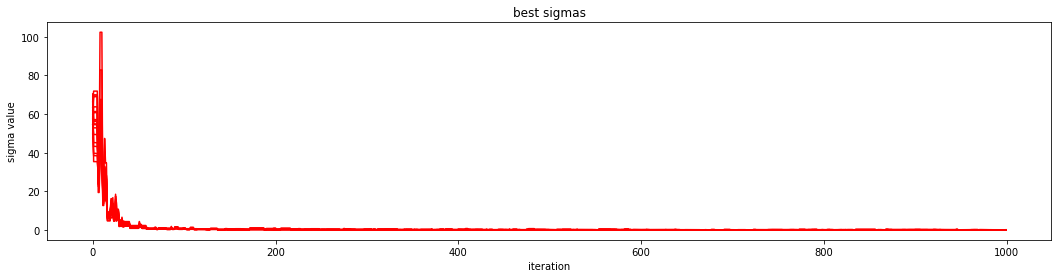

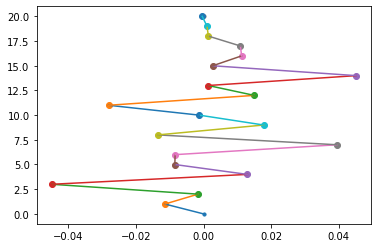

In [25]:
d = 20
N = 1000
T = 1000

target, arms_lens, lower_bounds, upper_bounds = (0, 20), np.ones(d), np.full(d, -360), np.full(d, 360)

def objective_function_inverse_kinematics1(X):
    return inverse_kinematics_objective_function(X, target, arms_lens, lower_bounds, upper_bounds)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_inverse_kinematics1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

plot_arm(history_best_chromosome[-1], target, arms_lens)

Iteration 0000 : best score = -1.49789622, mean score = -10.41635579.
Iteration 0100 : best score = -0.02742184, mean score = -0.44457122.
Iteration 0200 : best score = -0.00060256, mean score = -0.03293378.
Iteration 0300 : best score = -0.00007359, mean score = -0.00398253.
Iteration 0400 : best score = -0.00002884, mean score = -0.00046799.
Iteration 0500 : best score = -0.00000581, mean score = -0.00006804.
Iteration 0600 : best score = -0.00000032, mean score = -0.00001558.
Iteration 0700 : best score = -0.00000032, mean score = -0.00000472.
Iteration 0800 : best score = -0.00000005, mean score = -0.00000143.
Iteration 0900 : best score = -0.00000000, mean score = -0.00000016.


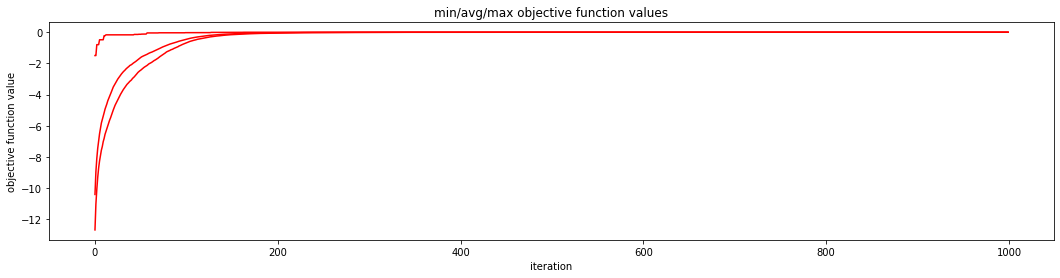

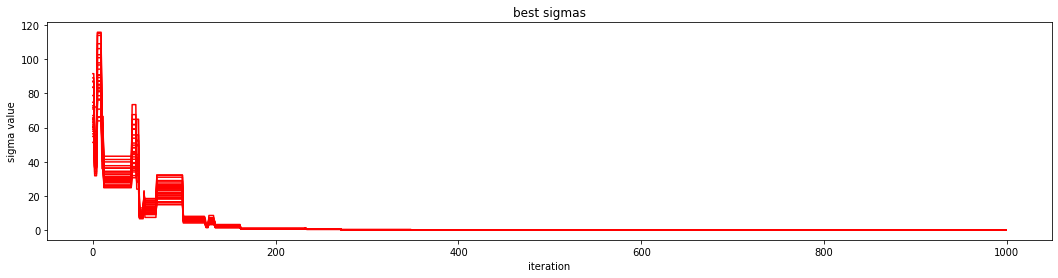

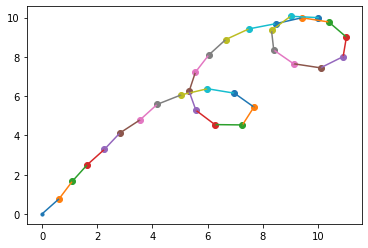

In [26]:
d = 30
N = 1000
T = 1000

target, arms_lens, lower_bounds, upper_bounds =  (10, 10), np.ones(d), np.full(d, -360), np.full(d, 360)

def objective_function_inverse_kinematics2(X):
    return inverse_kinematics_objective_function(X, target, arms_lens, lower_bounds, upper_bounds)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_inverse_kinematics2, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()


plot_arm(history_best_chromosome[-1], target, arms_lens)

Iteration 0000 : best score = -0.64804997, mean score = -20.31307915.
Iteration 0100 : best score = -0.17081074, mean score = -2.21495693.
Iteration 0200 : best score = -0.01187350, mean score = -1.53003754.
Iteration 0300 : best score = -0.01187350, mean score = -1.23373428.
Iteration 0400 : best score = -0.01187350, mean score = -1.05483861.
Iteration 0500 : best score = -0.01187350, mean score = -0.95549266.
Iteration 0600 : best score = -0.01187350, mean score = -0.85967700.
Iteration 0700 : best score = -0.01187350, mean score = -0.78802093.
Iteration 0800 : best score = -0.01187350, mean score = -0.73394491.
Iteration 0900 : best score = -0.01187350, mean score = -0.69165491.


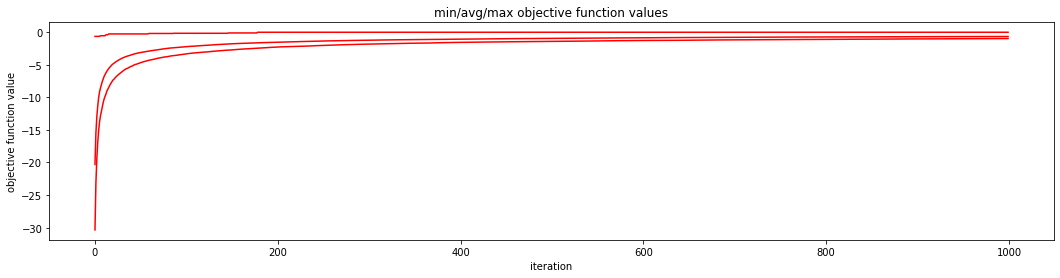

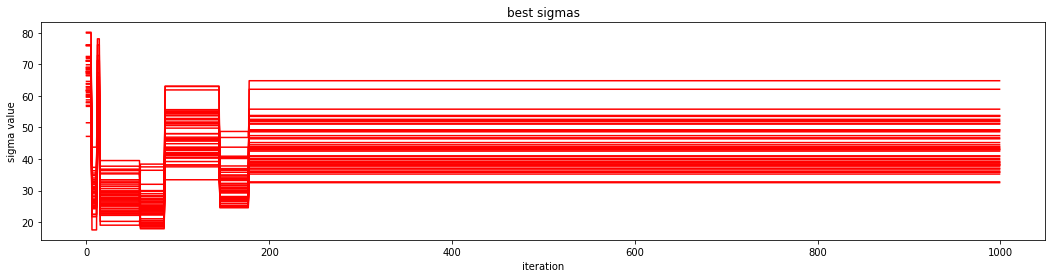

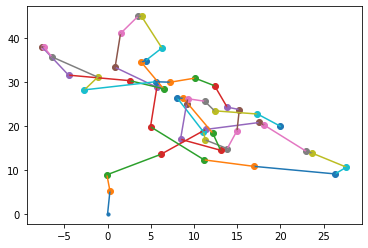

In [27]:
d = 50
N = 1000
T = 1000

target, arms_lens, lower_bounds, upper_bounds = (20, 20), np.random.uniform(0, 10, d), np.full(d, -360), np.full(d, 360)

def objective_function_inverse_kinematics3(X):
    return inverse_kinematics_objective_function(X, target, arms_lens, lower_bounds, upper_bounds)

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_inverse_kinematics3, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

plot_arm(history_best_chromosome[-1], target, arms_lens)